## 1. Import and observe dataset

In [1]:
# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Import the SnowballStemmer to perform stemming
import nltk
from nltk.stem.snowball import SnowballStemmer

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt
# gensim
from gensim import corpora, models, similarities, matutils
import seaborn as sns

# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from bokeh.plotting import figure, show, output_file, output_notebook

In [2]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')

In [3]:
df.columns = [column.strip() for column in df.columns] 

In [4]:
df['Title'] = df['Title'].str.strip()


In [5]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [6]:
df.shape

(34886, 8)

In [7]:
df1 = df.drop(columns=['Director','Cast','Wiki Page' ])


In [8]:
df1.head()

,Release Year,Title,Origin/Ethnicity,Genre,Plot
0,1901,Kansas Saloon Smashers,American,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,unknown,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,unknown,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,unknown,The earliest known adaptation of the classic f...


In [9]:
#filter out American movies
#group by 10 years into 5 df 2010s 2000s 90s 80s 70s before 
#df1.groupby(by="Release Year")


#### Focus on American movies

In [10]:
df1= df1.rename(columns = {'Origin/Ethnicity':'Origin','Release Year':'Year'})

In [11]:
#Extract rows that are American movies after 1980s
df2 =df1[df1.Origin == 'American']
df2 = df2[df2['Year'] >= 1980]
print (df2.shape)
df2.head()


(7707, 5)


,Year,Title,Origin,Genre,Plot
9670,1980,Airplane!,American,unknown,"As a parody film, Airplane! tells its story in..."
9671,1980,Alien Dead,American,unknown,A meteor strikes a houseboat in the swamps nea...
9672,1980,Alligator,American,unknown,A teenage girl purchases a baby American allig...
9673,1980,Altered States,American,unknown,"Edward Jessup is an abnormal psychologist who,..."
9674,1980,American Gigolo,American,unknown,"Julian Kaye is a male escort in Los Angeles, w..."


In [12]:
df2.info() # check for NAN values
#df2 = df2['Plot']
#print (df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7707 entries, 9670 to 17376
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    7707 non-null   int64 
 1   Title   7707 non-null   object
 2   Origin  7707 non-null   object
 3   Genre   7707 non-null   object
 4   Plot    7707 non-null   object
dtypes: int64(1), object(4)
memory usage: 361.3+ KB


In [13]:
df2.Genre.unique()

array(['unknown', 'sci-fi', 'mystery', 'comedy', 'war', 'horror',
       'thriller', 'adventure', 'drama, biography', 'drama, musical',
       'comedy, drama', 'science fiction', 'romance', 'drama',
       'crime drama', 'western', 'romantic comedy', 'action',
       'adventure, family', 'comedy, biography', 'musical comedy',
       'biography, drama', 'animation', 'comedy, musical',
       'crime, comedy', 'action, war', 'action, comedy',
       'fantasy, romance', 'action, adventure', 'western, biography',
       'fantasy, thriller', 'disaster film', 'drama, thriller',
       'fantasy, musical', 'spy', 'drama, animated', 'horror, comedy',
       'family', 'suspense', 'comedy, action', 'fantasy',
       'mystery, drama', 'biography', 'p.o.w.', 'spy film',
       'mystery, thriller', 'animated film', 'science-fiction',
       'comedy, family', 'sci-fi comedy', 'animated', 'comedy, anthology',
       'biography, war', 'musical', 'musical, drama', 'true crime',
       'epic, biography', 

In [14]:
#plt.figure(figsize=(15,10))
#plt.title('Distribution of Movie by Genre')
#sns.countplot(df2['Genre']) 
#df.filter(regex='regex') consider filtering by this? 
#Select columns whose name matches regular expression regex

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


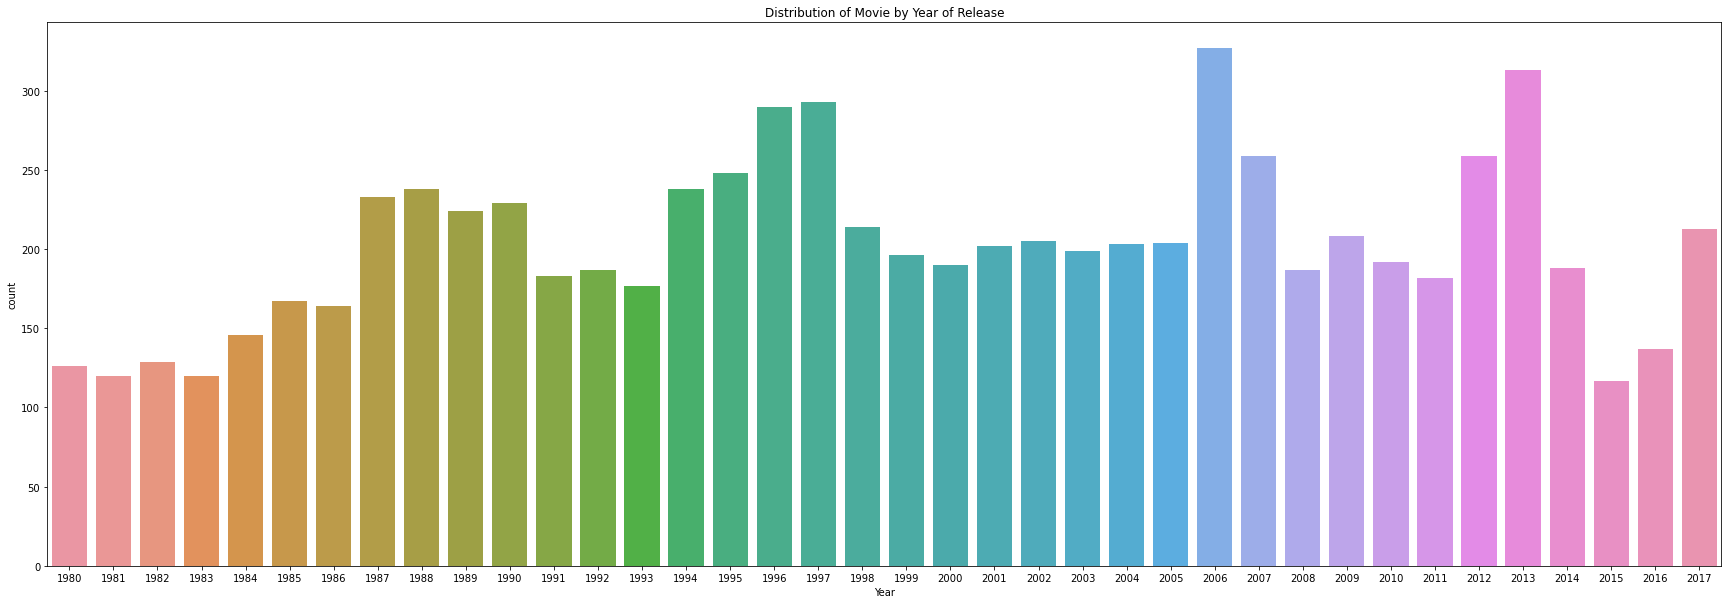

In [15]:
plt.figure(figsize=(30,10))
plt.title('Distribution of Movie by Year of Release')
sns.countplot(df2['Year'])
plt.savefig("Distribution of Movie by Year.png",transparent=True)
 

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


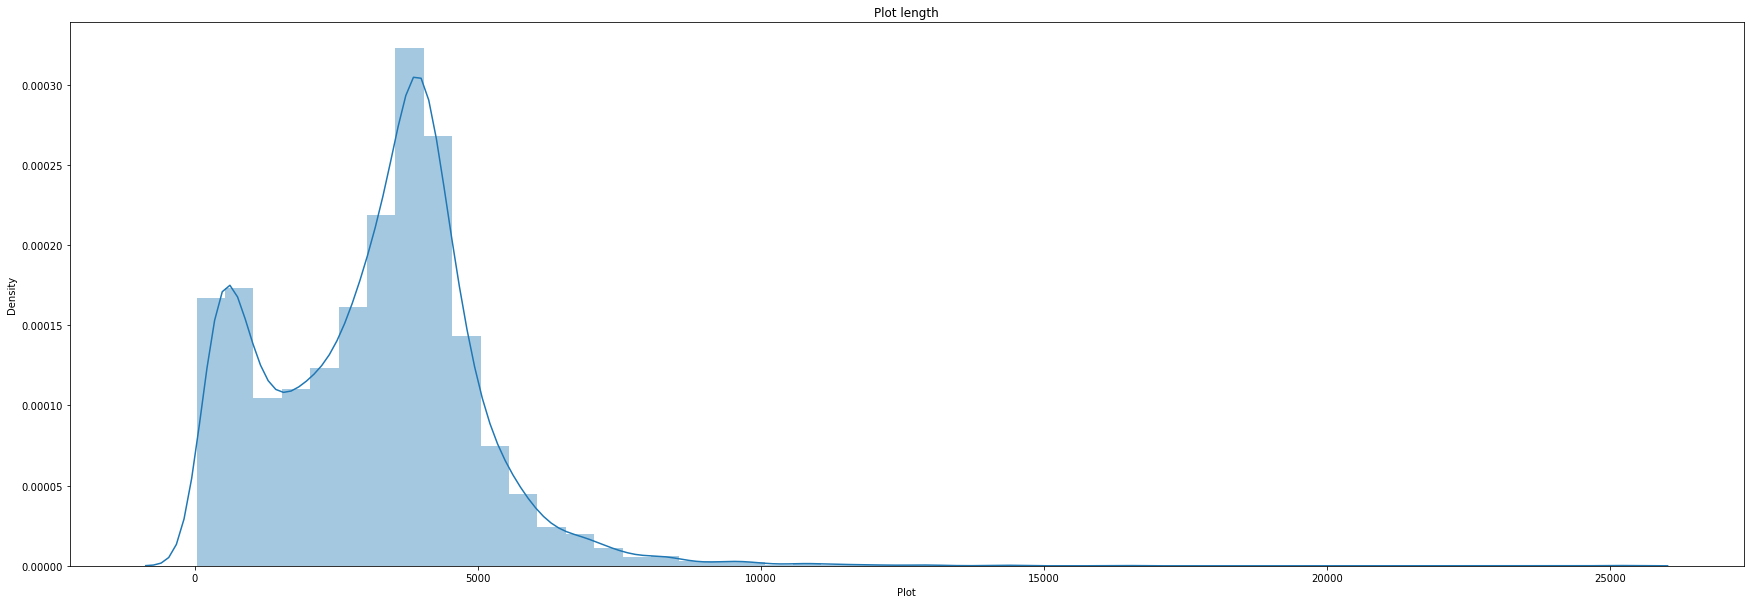

In [16]:
plt.figure(figsize=(30,10))
plt.title('Plot length')
sns.distplot(df2['Plot'].apply(lambda x: len(x)))
plt.savefig("Distribution of Plot length.png")

## 2. Tokenization and Stemming using NLTK 

In [17]:
stemmer = SnowballStemmer("english")
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems



In [18]:
words_stemmed = tokenize_and_stem("After three years in prison, Cruella de Vil has been cured of her desire for fur coats by Dr. Pavlov and is released into the custody of the probation office on the provision that she will be forced to pay the remainder of her fortune (eight million pounds) to all the dog shelters in the borough of Westminster should she repeat her crime. Cruella therefore mends her working relationship with her valet Alonzo and has him lock away all her fur coats. Cruella's probation officer, Chloe Simon, nevertheless suspects her, partly because Chloe is the owner of the now-adult Dipstick (one of the original 15 puppies from the previous film) who moved from Roger and Anita's house to her house.")
print(words_stemmed)

['after', 'three', 'year', 'in', 'prison', 'cruella', 'de', 'vil', 'has', 'been', 'cure', 'of', 'her', 'desir', 'for', 'fur', 'coat', 'by', 'dr.', 'pavlov', 'and', 'is', 'releas', 'into', 'the', 'custodi', 'of', 'the', 'probat', 'offic', 'on', 'the', 'provis', 'that', 'she', 'will', 'be', 'forc', 'to', 'pay', 'the', 'remaind', 'of', 'her', 'fortun', 'eight', 'million', 'pound', 'to', 'all', 'the', 'dog', 'shelter', 'in', 'the', 'borough', 'of', 'westminst', 'should', 'she', 'repeat', 'her', 'crime', 'cruella', 'therefor', 'mend', 'her', 'work', 'relationship', 'with', 'her', 'valet', 'alonzo', 'and', 'has', 'him', 'lock', 'away', 'all', 'her', 'fur', 'coat', 'cruella', "'s", 'probat', 'offic', 'chloe', 'simon', 'nevertheless', 'suspect', 'her', 'part', 'becaus', 'chloe', 'is', 'the', 'owner', 'of', 'the', 'now-adult', 'dipstick', 'one', 'of', 'the', 'origin', 'puppi', 'from', 'the', 'previous', 'film', 'who', 'move', 'from', 'roger', 'and', 'anita', "'s", 'hous', 'to', 'her', 'hous']


In [19]:
#nltk.download('punkt')

In [20]:
docs_stemmed = []
#docs_tokenized = []
for i in df2['Plot']:
    tokenized_and_stemmed_results = tokenize_and_stem(i)
    docs_stemmed.extend(tokenized_and_stemmed_results)
    
    #tokenized_results = tokenize_and_stem(i, False)
    #docs_tokenized.extend(tokenized_results)

In [21]:
#nltk.download('stopwords')

In [22]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['john', 'tell' , 'father' , 'mother', 'son' ,'daughter', 'brother', 'parent' , 'parents', 'wife', 'sister' , 'husband' ,'Michael' , 'ask' ,'say' , 'home','get' , 'go' , 'see' ,
                'take', 'make' , 'day',  'doe' , 'want' , 'night' , 'year', 'Back' , 'come' , 'use' ,'go' , 'one' ,'two' , 'new', 'time', 'find', 'move', 'away' , 'later', 'also' ,'end', 'become' , 'attempt', 'call','hous', 'car', 'back', 'leav', 'room', 'drive', 'next', 'goe', 'tri', 'house', 'befor','morning', 'outside']
stopwords.extend(newStopWords)

## 3.1  Vectorization with CountVectorizer

In [23]:
# Create a CountVectorizer for parsing/counting words
#count_vectorizer = CountVectorizer(ngram_range=(1, 1),  
#                                   stop_words='english',lowercase=False, token_pattern="\\b[a-z][a-z]+\\b")  #remove the capital letters refer to lect note SMith

#count_vectorizer.fit(df2['Plot'])

In [187]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 1),  
                                   stop_words=stopwords,lowercase=False,token_pattern="\\b[a-z][a-z]+\\b", tokenizer=tokenize_and_stem)  #remove the capital letters refer to lect note SMith

count_vectorizer.fit(df2['Plot'])

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'becom', 'could', 'dure', 'michael', 'might', 'morn', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'outsid', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(lowercase=False,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=<function tokenize_and_stem at 0x000001D2F452B708>)

In [188]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(df2['Plot']).transpose()

In [189]:
doc_word2 = count_vectorizer.transform(df2['Plot'])

In [190]:
#print (doc_word2)

In [191]:
#pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

In [192]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

In [193]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [194]:
len(id2word)

55044

## 3.2 Vectorization with TfidfVectorizer

In [24]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.09, stop_words=stopwords, #'english'
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [25]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in df2['Plot']])

print(tfidf_matrix.shape)

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'becom', 'could', 'dure', 'michael', 'might', 'morn', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'outsid', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(7707, 377)


In [26]:
doc_word3 = tfidf_vectorizer.transform(df2['Plot'])

In [27]:
doc_word4 = doc_word3.transpose()

In [28]:
# Convert sparse matrix of counts to a gensim corpus
corpus3 = matutils.Sparse2Corpus(doc_word4)

In [29]:
id2word3 = dict((v, k) for k, v in tfidf_vectorizer.vocabulary_.items())

In [37]:
#print(tfidf_vectorizer)

## Topic modeling with LDA with count_vectorizer 

In [195]:
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=50, random_state=10)  
#100 and 5 topics take 20mins

2020-10-25 18:12:44,528 : INFO : using symmetric alpha at 0.1
2020-10-25 18:12:44,529 : INFO : using symmetric eta at 0.1
2020-10-25 18:12:44,540 : INFO : using serial LDA version on this node
2020-10-25 18:12:44,593 : INFO : running online (multi-pass) LDA training, 10 topics, 50 passes over the supplied corpus of 7707 documents, updating model once every 2000 documents, evaluating perplexity every 7707 documents, iterating 50x with a convergence threshold of 0.001000
2020-10-25 18:12:44,641 : INFO : PROGRESS: pass 0, at document #2000/7707
2020-10-25 18:12:46,053 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:12:46,079 : INFO : topic #7 (0.100): 0.018*"'s" + 0.005*"kill" + 0.004*"return" + 0.003*"man" + 0.003*"escap" + 0.003*"film" + 0.003*"name" + 0.003*"discov" + 0.003*"meet" + 0.003*"dure"
2020-10-25 18:12:46,080 : INFO : topic #9 (0.100): 0.030*"'s" + 0.005*"kill" + 0.003*"return" + 0.003*"begin" + 0.003*"polic" + 0.003*"friend" + 0.003*

2020-10-25 18:12:59,653 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:12:59,680 : INFO : topic #4 (0.100): 0.028*"'s" + 0.005*"film" + 0.004*"show" + 0.004*"becom" + 0.004*"chris" + 0.004*"friend" + 0.003*"play" + 0.003*"bobbi" + 0.003*"school" + 0.003*"work"
2020-10-25 18:12:59,681 : INFO : topic #5 (0.100): 0.026*"'s" + 0.013*"jack" + 0.008*"alex" + 0.006*"david" + 0.004*"kill" + 0.004*"eric" + 0.003*"walter" + 0.003*"friend" + 0.003*"meet" + 0.003*"kate"
2020-10-25 18:12:59,682 : INFO : topic #9 (0.100): 0.031*"'s" + 0.004*"famili" + 0.004*"friend" + 0.003*"return" + 0.003*"meet" + 0.003*"michael" + 0.003*"becom" + 0.003*"kill" + 0.003*"joe" + 0.003*"work"
2020-10-25 18:12:59,683 : INFO : topic #1 (0.100): 0.028*"'s" + 0.009*"kill" + 0.005*"escap" + 0.004*"attack" + 0.003*"reveal" + 0.003*"forc" + 0.003*"return" + 0.003*"team" + 0.003*"max" + 0.003*"discov"
2020-10-25 18:12:59,685 : INFO : topic #6 (0.100): 0.017*"'s" + 0.006*"ami" + 0.005

2020-10-25 18:13:14,914 : INFO : topic #6 (0.100): 0.018*"'s" + 0.007*"alic" + 0.007*"ami" + 0.005*"maggi" + 0.004*"return" + 0.004*"becom" + 0.004*"julia" + 0.003*"kati" + 0.003*"friend" + 0.003*"max"
2020-10-25 18:13:14,915 : INFO : topic #4 (0.100): 0.027*"'s" + 0.006*"film" + 0.005*"show" + 0.005*"school" + 0.004*"chris" + 0.004*"perform" + 0.004*"play" + 0.004*"friend" + 0.004*"becom" + 0.003*"work"
2020-10-25 18:13:14,916 : INFO : topic #2 (0.100): 0.027*"'s" + 0.013*"kill" + 0.007*"polic" + 0.006*"murder" + 0.005*"frank" + 0.004*"shoot" + 0.004*"offic" + 0.004*"jess" + 0.004*"men" + 0.003*"drug"
2020-10-25 18:13:14,919 : INFO : topic diff=0.126589, rho=0.356836
2020-10-25 18:13:14,993 : INFO : PROGRESS: pass 3, at document #4000/7707
2020-10-25 18:13:16,341 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:13:16,368 : INFO : topic #2 (0.100): 0.027*"'s" + 0.014*"kill" + 0.007*"polic" + 0.007*"murder" + 0.005*"shoot" + 0.004*"frank" + 0.004

2020-10-25 18:13:27,539 : INFO : topic diff=0.089448, rho=0.336080
2020-10-25 18:13:30,811 : INFO : -8.969 per-word bound, 501.1 perplexity estimate based on a held-out corpus of 1707 documents with 534054 words
2020-10-25 18:13:30,812 : INFO : PROGRESS: pass 4, at document #7707/7707
2020-10-25 18:13:32,016 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:13:32,043 : INFO : topic #8 (0.100): 0.025*"'s" + 0.009*"paul" + 0.009*"tom" + 0.008*"harri" + 0.007*"jake" + 0.006*"peter" + 0.006*"georg" + 0.006*"henri" + 0.006*"love" + 0.006*"friend"
2020-10-25 18:13:32,044 : INFO : topic #6 (0.100): 0.019*"'s" + 0.009*"ami" + 0.009*"alic" + 0.006*"maggi" + 0.006*"julia" + 0.005*"kati" + 0.005*"max" + 0.005*"doug" + 0.004*"return" + 0.004*"becom"
2020-10-25 18:13:32,045 : INFO : topic #5 (0.100): 0.029*"jack" + 0.026*"'s" + 0.018*"david" + 0.013*"alex" + 0.009*"kate" + 0.006*"eric" + 0.006*"walter" + 0.005*"roger" + 0.004*"dylan" + 0.004*"jill"
2020-10-25

2020-10-25 18:13:43,603 : INFO : topic #3 (0.100): 0.016*"'s" + 0.011*"jim" + 0.009*"daniel" + 0.009*"edward" + 0.009*"linda" + 0.009*"ted" + 0.008*"vincent" + 0.007*"clair" + 0.006*"traci" + 0.006*"travi"
2020-10-25 18:13:43,604 : INFO : topic #4 (0.100): 0.026*"'s" + 0.008*"film" + 0.007*"school" + 0.006*"show" + 0.005*"play" + 0.005*"friend" + 0.005*"becom" + 0.004*"perform" + 0.004*"student" + 0.004*"chris"
2020-10-25 18:13:43,605 : INFO : topic #0 (0.100): 0.023*"'s" + 0.008*"kill" + 0.006*"team" + 0.005*"jame" + 0.004*"men" + 0.003*"marcus" + 0.003*"order" + 0.003*"arriv" + 0.003*"victor" + 0.003*"soldier"
2020-10-25 18:13:43,606 : INFO : topic #9 (0.100): 0.029*"'s" + 0.005*"friend" + 0.005*"famili" + 0.004*"becom" + 0.004*"return" + 0.004*"michael" + 0.003*"meet" + 0.003*"life" + 0.003*"work" + 0.003*"begin"
2020-10-25 18:13:43,609 : INFO : topic diff=0.067881, rho=0.303539
2020-10-25 18:13:43,690 : INFO : PROGRESS: pass 6, at document #6000/7707
2020-10-25 18:13:45,068 : INFO 

2020-10-25 18:13:57,840 : INFO : topic #4 (0.100): 0.025*"'s" + 0.008*"school" + 0.007*"film" + 0.006*"show" + 0.005*"play" + 0.005*"friend" + 0.005*"perform" + 0.005*"becom" + 0.005*"chris" + 0.004*"student"
2020-10-25 18:13:57,842 : INFO : topic #0 (0.100): 0.022*"'s" + 0.008*"kill" + 0.007*"team" + 0.006*"jame" + 0.005*"marcus" + 0.004*"victor" + 0.004*"order" + 0.003*"men" + 0.003*"soldier" + 0.003*"arriv"
2020-10-25 18:13:57,845 : INFO : topic diff=0.069372, rho=0.290454
2020-10-25 18:13:57,922 : INFO : PROGRESS: pass 8, at document #2000/7707
2020-10-25 18:13:59,186 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:13:59,214 : INFO : topic #9 (0.100): 0.029*"'s" + 0.005*"famili" + 0.005*"friend" + 0.004*"becom" + 0.004*"meet" + 0.004*"return" + 0.004*"work" + 0.003*"life" + 0.003*"michael" + 0.003*"live"
2020-10-25 18:13:59,215 : INFO : topic #2 (0.100): 0.029*"'s" + 0.016*"kill" + 0.010*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.005*"off

2020-10-25 18:14:11,350 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:14:11,380 : INFO : topic #9 (0.100): 0.029*"'s" + 0.005*"famili" + 0.005*"friend" + 0.004*"becom" + 0.004*"life" + 0.004*"meet" + 0.004*"return" + 0.004*"work" + 0.003*"michael" + 0.003*"live"
2020-10-25 18:14:11,380 : INFO : topic #2 (0.100): 0.029*"'s" + 0.017*"kill" + 0.010*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.005*"offic" + 0.005*"money" + 0.004*"frank" + 0.004*"drug" + 0.004*"gun"
2020-10-25 18:14:11,382 : INFO : topic #7 (0.100): 0.021*"'s" + 0.011*"kill" + 0.006*"nick" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"return" + 0.004*"discov" + 0.004*"arriv" + 0.004*"run"
2020-10-25 18:14:11,383 : INFO : topic #3 (0.100): 0.015*"jim" + 0.014*"'s" + 0.013*"edward" + 0.011*"daniel" + 0.011*"ted" + 0.010*"clair" + 0.009*"linda" + 0.009*"vincent" + 0.007*"traci" + 0.007*"jessica"
2020-10-25 18:14:11,384 : INFO : topic #8 (0.100): 0.026*"'s" + 0.010*"tom" + 

2020-10-25 18:14:25,596 : INFO : topic #7 (0.100): 0.021*"'s" + 0.012*"kill" + 0.006*"nick" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:14:25,597 : INFO : topic #8 (0.100): 0.026*"'s" + 0.011*"paul" + 0.010*"harri" + 0.010*"tom" + 0.008*"jake" + 0.008*"peter" + 0.007*"georg" + 0.007*"henri" + 0.006*"sam" + 0.006*"love"
2020-10-25 18:14:25,598 : INFO : topic #2 (0.100): 0.029*"'s" + 0.017*"kill" + 0.010*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"frank" + 0.004*"drug" + 0.004*"escap"
2020-10-25 18:14:25,601 : INFO : topic diff=0.052463, rho=0.251152
2020-10-25 18:14:25,681 : INFO : PROGRESS: pass 11, at document #4000/7707
2020-10-25 18:14:26,909 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:14:26,936 : INFO : topic #8 (0.100): 0.026*"'s" + 0.010*"tom" + 0.010*"paul" + 0.010*"harri" + 0.008*"jake" + 0.008*"peter" + 0.007*"geo

2020-10-25 18:14:37,405 : INFO : topic diff=0.040981, rho=0.243587
2020-10-25 18:14:40,638 : INFO : -8.799 per-word bound, 445.4 perplexity estimate based on a held-out corpus of 1707 documents with 534054 words
2020-10-25 18:14:40,639 : INFO : PROGRESS: pass 12, at document #7707/7707
2020-10-25 18:14:41,848 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:14:41,879 : INFO : topic #3 (0.100): 0.016*"jim" + 0.014*"edward" + 0.014*"daniel" + 0.013*"'s" + 0.012*"clair" + 0.011*"ted" + 0.011*"linda" + 0.011*"vincent" + 0.008*"jay" + 0.007*"travi"
2020-10-25 18:14:41,880 : INFO : topic #6 (0.100): 0.021*"'s" + 0.015*"max" + 0.010*"ami" + 0.010*"alic" + 0.007*"maggi" + 0.007*"king" + 0.006*"julia" + 0.006*"kati" + 0.006*"doug" + 0.006*"queen"
2020-10-25 18:14:41,881 : INFO : topic #2 (0.100): 0.030*"'s" + 0.017*"kill" + 0.010*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.004*"drug" + 0.004*"escap" + 0.004*"arrest"
2020-

2020-10-25 18:14:53,245 : INFO : topic #9 (0.100): 0.029*"'s" + 0.005*"famili" + 0.005*"friend" + 0.004*"becom" + 0.004*"life" + 0.004*"work" + 0.004*"meet" + 0.004*"return" + 0.004*"live" + 0.003*"begin"
2020-10-25 18:14:53,246 : INFO : topic #2 (0.100): 0.030*"'s" + 0.017*"kill" + 0.011*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.004*"frank" + 0.004*"drug" + 0.004*"gun"
2020-10-25 18:14:53,247 : INFO : topic #7 (0.100): 0.022*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.006*"nick" + 0.005*"bodi" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:14:53,248 : INFO : topic #5 (0.100): 0.042*"jack" + 0.024*"'s" + 0.024*"david" + 0.017*"alex" + 0.013*"kate" + 0.009*"eric" + 0.008*"walter" + 0.007*"roger" + 0.007*"susan" + 0.006*"marti"
2020-10-25 18:14:53,251 : INFO : topic diff=0.038497, rho=0.230305
2020-10-25 18:14:53,343 : INFO : PROGRESS: pass 14, at document #6000/7707
2020-10-25 18:14:54,702 : INFO : merging ch

2020-10-25 18:15:08,247 : INFO : topic #9 (0.100): 0.029*"'s" + 0.005*"famili" + 0.005*"friend" + 0.004*"becom" + 0.004*"life" + 0.004*"meet" + 0.004*"work" + 0.004*"return" + 0.004*"live" + 0.003*"love"
2020-10-25 18:15:08,248 : INFO : topic #8 (0.100): 0.026*"'s" + 0.011*"paul" + 0.011*"tom" + 0.010*"harri" + 0.009*"jake" + 0.008*"peter" + 0.008*"georg" + 0.008*"sam" + 0.007*"henri" + 0.006*"sarah"
2020-10-25 18:15:08,251 : INFO : topic diff=0.045613, rho=0.224430
2020-10-25 18:15:08,327 : INFO : PROGRESS: pass 16, at document #2000/7707
2020-10-25 18:15:09,556 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:15:09,583 : INFO : topic #7 (0.100): 0.022*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"nick" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:15:09,584 : INFO : topic #4 (0.100): 0.024*"'s" + 0.010*"school" + 0.008*"film" + 0.007*"play" + 0.006*"show" + 0.005*"student" + 0.005*

2020-10-25 18:15:20,914 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:15:20,941 : INFO : topic #2 (0.100): 0.030*"'s" + 0.017*"kill" + 0.010*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"drug" + 0.005*"gun" + 0.004*"escap"
2020-10-25 18:15:20,942 : INFO : topic #1 (0.100): 0.025*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"human" + 0.004*"return"
2020-10-25 18:15:20,943 : INFO : topic #0 (0.100): 0.019*"'s" + 0.006*"kill" + 0.006*"jame" + 0.005*"team" + 0.005*"war" + 0.005*"soldier" + 0.005*"marcus" + 0.004*"order" + 0.004*"men" + 0.004*"train"
2020-10-25 18:15:20,945 : INFO : topic #4 (0.100): 0.024*"'s" + 0.010*"school" + 0.008*"film" + 0.007*"play" + 0.006*"show" + 0.006*"game" + 0.005*"friend" + 0.005*"team" + 0.005*"student" + 0.005*"becom"
2020-10-25 18:15:20,945 : INFO : topic #8 (0.100): 0.026*"'s" + 0.011*"tom" + 0.011

2020-10-25 18:15:35,086 : INFO : topic #7 (0.100): 0.022*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"nick" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:15:35,087 : INFO : topic #3 (0.100): 0.019*"jim" + 0.015*"daniel" + 0.015*"edward" + 0.013*"ted" + 0.013*"linda" + 0.013*"vincent" + 0.012*"clair" + 0.009*"'s" + 0.009*"traci" + 0.008*"jay"
2020-10-25 18:15:35,088 : INFO : topic #1 (0.100): 0.025*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"alien" + 0.004*"return"
2020-10-25 18:15:35,091 : INFO : topic diff=0.038798, rho=0.204750
2020-10-25 18:15:35,168 : INFO : PROGRESS: pass 19, at document #4000/7707
2020-10-25 18:15:36,464 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:15:36,491 : INFO : topic #4 (0.100): 0.024*"'s" + 0.010*"school" + 0.008*"film" + 0.007*"play" + 0.006*"show" + 0.006*"game" + 0.

2020-10-25 18:15:46,433 : INFO : topic diff=0.029934, rho=0.200589
2020-10-25 18:15:49,583 : INFO : -8.759 per-word bound, 433.4 perplexity estimate based on a held-out corpus of 1707 documents with 534054 words
2020-10-25 18:15:49,584 : INFO : PROGRESS: pass 20, at document #7707/7707
2020-10-25 18:15:50,705 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:15:50,733 : INFO : topic #6 (0.100): 0.021*"'s" + 0.018*"max" + 0.010*"alic" + 0.010*"ami" + 0.010*"king" + 0.007*"maggi" + 0.006*"julia" + 0.006*"kati" + 0.006*"magic" + 0.006*"doug"
2020-10-25 18:15:50,733 : INFO : topic #8 (0.100): 0.026*"'s" + 0.012*"paul" + 0.011*"tom" + 0.011*"harri" + 0.009*"jake" + 0.009*"peter" + 0.009*"sam" + 0.008*"georg" + 0.008*"henri" + 0.006*"sarah"
2020-10-25 18:15:50,734 : INFO : topic #2 (0.100): 0.030*"'s" + 0.017*"kill" + 0.010*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"escap" + 0.005*"drug" + 0.005*"arrest"
2020-10-2

2020-10-25 18:16:01,809 : INFO : topic #0 (0.100): 0.018*"'s" + 0.006*"jame" + 0.006*"kill" + 0.005*"war" + 0.005*"soldier" + 0.005*"marcus" + 0.005*"team" + 0.004*"order" + 0.004*"men" + 0.004*"train"
2020-10-25 18:16:01,809 : INFO : topic #5 (0.100): 0.047*"jack" + 0.027*"david" + 0.023*"'s" + 0.019*"alex" + 0.014*"kate" + 0.010*"eric" + 0.009*"walter" + 0.007*"roger" + 0.007*"susan" + 0.007*"marti"
2020-10-25 18:16:01,810 : INFO : topic #3 (0.100): 0.019*"jim" + 0.014*"daniel" + 0.014*"edward" + 0.014*"ted" + 0.013*"linda" + 0.013*"vincent" + 0.012*"clair" + 0.009*"traci" + 0.009*"travi" + 0.008*"'s"
2020-10-25 18:16:01,812 : INFO : topic #1 (0.100): 0.025*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"return" + 0.004*"alien"
2020-10-25 18:16:01,815 : INFO : topic diff=0.029817, rho=0.192974
2020-10-25 18:16:01,898 : INFO : PROGRESS: pass 22, at document #6000/7707
2020-10-25 18:16:03,199 : INFO : merging

2020-10-25 18:16:16,375 : INFO : topic #0 (0.100): 0.018*"'s" + 0.007*"jame" + 0.006*"kill" + 0.006*"marcus" + 0.005*"war" + 0.005*"soldier" + 0.005*"team" + 0.004*"order" + 0.004*"victor" + 0.004*"train"
2020-10-25 18:16:16,376 : INFO : topic #1 (0.100): 0.025*"'s" + 0.009*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"human" + 0.004*"return"
2020-10-25 18:16:16,380 : INFO : topic diff=0.037074, rho=0.189479
2020-10-25 18:16:16,462 : INFO : PROGRESS: pass 24, at document #2000/7707
2020-10-25 18:16:17,674 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:16:17,701 : INFO : topic #7 (0.100): 0.022*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"nick" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:16:17,702 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.004*"life" + 0.004*"becom" + 0.004*"work" 

2020-10-25 18:16:27,578 : INFO : PROGRESS: pass 25, at document #6000/7707
2020-10-25 18:16:28,878 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:16:28,907 : INFO : topic #8 (0.100): 0.026*"'s" + 0.013*"tom" + 0.013*"paul" + 0.012*"harri" + 0.010*"peter" + 0.010*"jake" + 0.010*"sam" + 0.009*"georg" + 0.008*"henri" + 0.007*"sarah"
2020-10-25 18:16:28,907 : INFO : topic #7 (0.100): 0.022*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"return" + 0.005*"nick" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:16:28,907 : INFO : topic #0 (0.100): 0.018*"'s" + 0.006*"jame" + 0.006*"kill" + 0.006*"war" + 0.005*"soldier" + 0.005*"marcus" + 0.004*"order" + 0.004*"team" + 0.004*"train" + 0.004*"men"
2020-10-25 18:16:28,909 : INFO : topic #6 (0.100): 0.021*"'s" + 0.020*"max" + 0.011*"king" + 0.010*"ami" + 0.010*"alic" + 0.008*"maggi" + 0.006*"castl" + 0.006*"magic" + 0.006*"julia" + 0.006*"doug"
2020-10-25 18:16:28,

2020-10-25 18:16:42,864 : INFO : topic #2 (0.100): 0.030*"'s" + 0.017*"kill" + 0.011*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"escap" + 0.005*"drug" + 0.004*"frank"
2020-10-25 18:16:42,865 : INFO : topic #5 (0.100): 0.048*"jack" + 0.030*"david" + 0.022*"'s" + 0.021*"alex" + 0.015*"kate" + 0.010*"walter" + 0.010*"eric" + 0.008*"roger" + 0.008*"susan" + 0.007*"marti"
2020-10-25 18:16:42,867 : INFO : topic #0 (0.100): 0.018*"'s" + 0.007*"jame" + 0.006*"kill" + 0.006*"war" + 0.005*"soldier" + 0.005*"marcus" + 0.004*"order" + 0.004*"train" + 0.004*"team" + 0.004*"victor"
2020-10-25 18:16:42,868 : INFO : topic #8 (0.100): 0.026*"'s" + 0.013*"paul" + 0.012*"tom" + 0.012*"harri" + 0.010*"jake" + 0.010*"sam" + 0.010*"peter" + 0.009*"georg" + 0.008*"henri" + 0.007*"sarah"
2020-10-25 18:16:42,871 : INFO : topic diff=0.032218, rho=0.177183
2020-10-25 18:16:42,946 : INFO : PROGRESS: pass 27, at document #4000/7707
2020-10-25 18:16:44,117 : INFO : merging chan

2020-10-25 18:16:53,744 : INFO : topic #7 (0.100): 0.022*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"return" + 0.004*"discov" + 0.004*"nick" + 0.004*"run" + 0.004*"arriv"
2020-10-25 18:16:53,748 : INFO : topic diff=0.024610, rho=0.174465
2020-10-25 18:16:56,831 : INFO : -8.739 per-word bound, 427.3 perplexity estimate based on a held-out corpus of 1707 documents with 534054 words
2020-10-25 18:16:56,831 : INFO : PROGRESS: pass 28, at document #7707/7707
2020-10-25 18:16:57,901 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:16:57,928 : INFO : topic #0 (0.100): 0.018*"'s" + 0.007*"jame" + 0.006*"kill" + 0.006*"marcus" + 0.006*"war" + 0.005*"soldier" + 0.004*"order" + 0.004*"train" + 0.004*"victor" + 0.004*"team"
2020-10-25 18:16:57,929 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.004*"life" + 0.004*"becom" + 0.004*"meet" + 0.004*"work" + 0.004*"live" + 0.004*"love" + 0.004*"return"


2020-10-25 18:17:09,155 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:17:09,182 : INFO : topic #2 (0.100): 0.030*"'s" + 0.017*"kill" + 0.011*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"escap" + 0.005*"drug" + 0.004*"gun"
2020-10-25 18:17:09,183 : INFO : topic #4 (0.100): 0.023*"'s" + 0.010*"school" + 0.007*"film" + 0.007*"play" + 0.006*"game" + 0.006*"show" + 0.006*"team" + 0.005*"student" + 0.005*"friend" + 0.005*"perform"
2020-10-25 18:17:09,184 : INFO : topic #0 (0.100): 0.017*"'s" + 0.007*"jame" + 0.006*"war" + 0.006*"kill" + 0.006*"soldier" + 0.005*"marcus" + 0.004*"order" + 0.004*"train" + 0.004*"men" + 0.004*"victor"
2020-10-25 18:17:09,185 : INFO : topic #8 (0.100): 0.026*"'s" + 0.013*"paul" + 0.013*"tom" + 0.013*"harri" + 0.011*"sam" + 0.011*"jake" + 0.010*"peter" + 0.009*"georg" + 0.009*"henri" + 0.007*"sarah"
2020-10-25 18:17:09,186 : INFO : topic #1 (0.100): 0.024*"'s" + 0.008*"kill" + 0.006*"

2020-10-25 18:17:22,919 : INFO : topic #1 (0.100): 0.025*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"human" + 0.004*"return"
2020-10-25 18:17:22,920 : INFO : topic #8 (0.100): 0.026*"'s" + 0.014*"paul" + 0.013*"tom" + 0.012*"harri" + 0.011*"jake" + 0.011*"sam" + 0.011*"peter" + 0.009*"georg" + 0.009*"henri" + 0.007*"sarah"
2020-10-25 18:17:22,922 : INFO : topic #6 (0.100): 0.022*"'s" + 0.019*"max" + 0.011*"king" + 0.010*"alic" + 0.010*"ami" + 0.007*"maggi" + 0.006*"magic" + 0.006*"julia" + 0.006*"kati" + 0.006*"doug"
2020-10-25 18:17:22,925 : INFO : topic diff=0.032252, rho=0.167007
2020-10-25 18:17:23,001 : INFO : PROGRESS: pass 32, at document #2000/7707
2020-10-25 18:17:24,137 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:17:24,166 : INFO : topic #0 (0.100): 0.017*"'s" + 0.007*"jame" + 0.006*"war" + 0.006*"soldier" + 0.006*"kill" + 0.005*"marcus" + 0.004*"ord

2020-10-25 18:17:33,615 : INFO : topic diff=0.023842, rho=0.162535
2020-10-25 18:17:33,700 : INFO : PROGRESS: pass 33, at document #6000/7707
2020-10-25 18:17:34,969 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:17:34,996 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.004*"life" + 0.004*"becom" + 0.004*"work" + 0.004*"meet" + 0.004*"love" + 0.004*"live" + 0.004*"return"
2020-10-25 18:17:34,997 : INFO : topic #7 (0.100): 0.023*"'s" + 0.012*"kill" + 0.006*"escap" + 0.006*"attack" + 0.005*"bodi" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv" + 0.004*"death"
2020-10-25 18:17:34,998 : INFO : topic #4 (0.100): 0.023*"'s" + 0.010*"school" + 0.008*"film" + 0.007*"play" + 0.007*"game" + 0.006*"show" + 0.006*"team" + 0.005*"student" + 0.005*"friend" + 0.005*"win"
2020-10-25 18:17:34,999 : INFO : topic #2 (0.100): 0.031*"'s" + 0.017*"kill" + 0.011*"polic" + 0.008*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.

2020-10-25 18:17:48,810 : INFO : topic #5 (0.100): 0.051*"jack" + 0.031*"david" + 0.022*"alex" + 0.021*"'s" + 0.016*"kate" + 0.011*"walter" + 0.011*"eric" + 0.009*"roger" + 0.008*"susan" + 0.007*"marti"
2020-10-25 18:17:48,811 : INFO : topic #7 (0.100): 0.023*"'s" + 0.012*"kill" + 0.006*"attack" + 0.006*"escap" + 0.005*"bodi" + 0.005*"return" + 0.004*"discov" + 0.004*"run" + 0.004*"arriv" + 0.004*"death"
2020-10-25 18:17:48,812 : INFO : topic #8 (0.100): 0.025*"'s" + 0.014*"paul" + 0.013*"tom" + 0.013*"harri" + 0.011*"sam" + 0.011*"jake" + 0.011*"peter" + 0.010*"georg" + 0.009*"henri" + 0.008*"sarah"
2020-10-25 18:17:48,813 : INFO : topic #0 (0.100): 0.017*"'s" + 0.007*"jame" + 0.006*"war" + 0.006*"soldier" + 0.005*"kill" + 0.005*"marcus" + 0.004*"order" + 0.004*"train" + 0.004*"men" + 0.004*"victor"
2020-10-25 18:17:48,816 : INFO : topic diff=0.027874, rho=0.158404
2020-10-25 18:17:48,894 : INFO : PROGRESS: pass 35, at document #4000/7707
2020-10-25 18:17:50,092 : INFO : merging chang

2020-10-25 18:17:59,606 : INFO : topic #5 (0.100): 0.051*"jack" + 0.030*"david" + 0.023*"alex" + 0.021*"'s" + 0.017*"kate" + 0.011*"walter" + 0.010*"eric" + 0.008*"roger" + 0.008*"susan" + 0.007*"marti"
2020-10-25 18:17:59,610 : INFO : topic diff=0.021228, rho=0.156454
2020-10-25 18:18:02,709 : INFO : -8.727 per-word bound, 423.8 perplexity estimate based on a held-out corpus of 1707 documents with 534054 words
2020-10-25 18:18:02,710 : INFO : PROGRESS: pass 36, at document #7707/7707
2020-10-25 18:18:03,777 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:18:03,807 : INFO : topic #5 (0.100): 0.052*"jack" + 0.033*"david" + 0.023*"alex" + 0.021*"'s" + 0.018*"kate" + 0.011*"eric" + 0.011*"walter" + 0.008*"roger" + 0.008*"susan" + 0.007*"arthur"
2020-10-25 18:18:03,808 : INFO : topic #6 (0.100): 0.022*"'s" + 0.019*"max" + 0.011*"king" + 0.010*"alic" + 0.010*"ami" + 0.007*"maggi" + 0.006*"magic" + 0.006*"julia" + 0.006*"kati" + 0.006*"queen"
2020-10

2020-10-25 18:18:14,862 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:18:14,890 : INFO : topic #1 (0.100): 0.024*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"return" + 0.004*"alien"
2020-10-25 18:18:14,891 : INFO : topic #6 (0.100): 0.022*"'s" + 0.020*"max" + 0.011*"king" + 0.010*"alic" + 0.010*"ami" + 0.008*"maggi" + 0.006*"magic" + 0.006*"castl" + 0.006*"queen" + 0.006*"doug"
2020-10-25 18:18:14,892 : INFO : topic #3 (0.100): 0.021*"jim" + 0.016*"daniel" + 0.015*"edward" + 0.015*"ted" + 0.014*"linda" + 0.014*"vincent" + 0.013*"clair" + 0.010*"traci" + 0.009*"travi" + 0.008*"jessica"
2020-10-25 18:18:14,893 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.004*"life" + 0.004*"becom" + 0.004*"work" + 0.004*"meet" + 0.004*"love" + 0.004*"live" + 0.004*"return"
2020-10-25 18:18:14,894 : INFO : topic #8 (0.100): 0.025*"'s" + 0.015*"paul" + 

2020-10-25 18:18:28,531 : INFO : topic #8 (0.100): 0.025*"'s" + 0.015*"paul" + 0.014*"tom" + 0.013*"harri" + 0.012*"sam" + 0.012*"jake" + 0.011*"peter" + 0.010*"georg" + 0.010*"henri" + 0.008*"sarah"
2020-10-25 18:18:28,532 : INFO : topic #5 (0.100): 0.052*"jack" + 0.033*"david" + 0.024*"alex" + 0.021*"'s" + 0.018*"kate" + 0.011*"eric" + 0.011*"walter" + 0.008*"roger" + 0.008*"susan" + 0.007*"marti"
2020-10-25 18:18:28,533 : INFO : topic #4 (0.100): 0.023*"'s" + 0.011*"school" + 0.007*"film" + 0.007*"play" + 0.007*"game" + 0.007*"show" + 0.006*"team" + 0.005*"student" + 0.005*"friend" + 0.005*"perform"
2020-10-25 18:18:28,536 : INFO : topic diff=0.028914, rho=0.151007
2020-10-25 18:18:28,612 : INFO : PROGRESS: pass 40, at document #2000/7707
2020-10-25 18:18:29,811 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:18:29,841 : INFO : topic #4 (0.100): 0.023*"'s" + 0.011*"school" + 0.007*"film" + 0.007*"play" + 0.007*"show" + 0.006*"game" + 0.006*"

2020-10-25 18:18:39,263 : INFO : topic diff=0.021301, rho=0.147677
2020-10-25 18:18:39,354 : INFO : PROGRESS: pass 41, at document #6000/7707
2020-10-25 18:18:40,594 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:18:40,621 : INFO : topic #4 (0.100): 0.023*"'s" + 0.011*"school" + 0.007*"film" + 0.007*"play" + 0.007*"game" + 0.006*"show" + 0.006*"team" + 0.005*"student" + 0.005*"win" + 0.005*"friend"
2020-10-25 18:18:40,622 : INFO : topic #2 (0.100): 0.031*"'s" + 0.017*"kill" + 0.011*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"escap" + 0.005*"drug" + 0.005*"gun"
2020-10-25 18:18:40,623 : INFO : topic #0 (0.100): 0.017*"'s" + 0.006*"jame" + 0.006*"war" + 0.006*"soldier" + 0.005*"kill" + 0.005*"marcus" + 0.005*"order" + 0.004*"train" + 0.004*"armi" + 0.004*"men"
2020-10-25 18:18:40,624 : INFO : topic #1 (0.100): 0.024*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004

2020-10-25 18:18:54,084 : INFO : topic #1 (0.100): 0.025*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"alien" + 0.004*"return"
2020-10-25 18:18:54,085 : INFO : topic #3 (0.100): 0.022*"jim" + 0.017*"daniel" + 0.017*"edward" + 0.015*"ted" + 0.014*"linda" + 0.014*"vincent" + 0.014*"clair" + 0.010*"traci" + 0.009*"travi" + 0.009*"jay"
2020-10-25 18:18:54,086 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.004*"life" + 0.004*"becom" + 0.004*"work" + 0.004*"meet" + 0.004*"love" + 0.004*"live" + 0.004*"return"
2020-10-25 18:18:54,087 : INFO : topic #8 (0.100): 0.025*"'s" + 0.016*"paul" + 0.014*"tom" + 0.014*"harri" + 0.012*"sam" + 0.012*"jake" + 0.012*"peter" + 0.010*"georg" + 0.010*"henri" + 0.008*"sarah"
2020-10-25 18:18:54,090 : INFO : topic diff=0.025018, rho=0.144558
2020-10-25 18:18:54,166 : INFO : PROGRESS: pass 43, at document #4000/7707
2020-10-25 18:18:55,358 : INFO : merging

2020-10-25 18:19:05,170 : INFO : topic #0 (0.100): 0.016*"'s" + 0.006*"jame" + 0.006*"war" + 0.006*"soldier" + 0.005*"kill" + 0.005*"marcus" + 0.005*"order" + 0.004*"train" + 0.004*"armi" + 0.004*"men"
2020-10-25 18:19:05,173 : INFO : topic diff=0.019043, rho=0.143071
2020-10-25 18:19:08,269 : INFO : -8.718 per-word bound, 421.2 perplexity estimate based on a held-out corpus of 1707 documents with 534054 words
2020-10-25 18:19:08,270 : INFO : PROGRESS: pass 44, at document #7707/7707
2020-10-25 18:19:09,330 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:19:09,360 : INFO : topic #6 (0.100): 0.022*"'s" + 0.019*"max" + 0.011*"king" + 0.010*"alic" + 0.010*"ami" + 0.007*"maggi" + 0.007*"magic" + 0.006*"julia" + 0.006*"queen" + 0.006*"doug"
2020-10-25 18:19:09,361 : INFO : topic #4 (0.100): 0.023*"'s" + 0.011*"school" + 0.007*"film" + 0.007*"play" + 0.007*"game" + 0.007*"show" + 0.006*"team" + 0.005*"student" + 0.005*"friend" + 0.005*"perform"
2020-

2020-10-25 18:19:19,874 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:19:19,902 : INFO : topic #4 (0.100): 0.023*"'s" + 0.011*"school" + 0.007*"play" + 0.007*"film" + 0.007*"game" + 0.006*"show" + 0.006*"team" + 0.005*"student" + 0.005*"win" + 0.005*"friend"
2020-10-25 18:19:19,903 : INFO : topic #0 (0.100): 0.016*"'s" + 0.007*"jame" + 0.006*"war" + 0.006*"soldier" + 0.005*"kill" + 0.005*"marcus" + 0.004*"order" + 0.004*"train" + 0.004*"men" + 0.004*"armi"
2020-10-25 18:19:19,903 : INFO : topic #3 (0.100): 0.021*"jim" + 0.016*"daniel" + 0.016*"edward" + 0.015*"ted" + 0.014*"linda" + 0.014*"vincent" + 0.013*"clair" + 0.010*"traci" + 0.010*"travi" + 0.009*"jessica"
2020-10-25 18:19:19,904 : INFO : topic #8 (0.100): 0.025*"'s" + 0.016*"paul" + 0.016*"tom" + 0.015*"harri" + 0.013*"sam" + 0.012*"jake" + 0.012*"peter" + 0.011*"georg" + 0.010*"henri" + 0.008*"sarah"
2020-10-25 18:19:19,906 : INFO : topic #2 (0.100): 0.031*"'s" + 0.017*"kill" + 0.011

2020-10-25 18:19:33,404 : INFO : topic #5 (0.100): 0.054*"jack" + 0.034*"david" + 0.024*"alex" + 0.020*"'s" + 0.018*"kate" + 0.011*"eric" + 0.011*"walter" + 0.009*"roger" + 0.008*"susan" + 0.007*"marti"
2020-10-25 18:19:33,405 : INFO : topic #0 (0.100): 0.016*"'s" + 0.007*"jame" + 0.006*"war" + 0.006*"marcus" + 0.006*"soldier" + 0.005*"kill" + 0.005*"order" + 0.005*"train" + 0.004*"victor" + 0.004*"armi"
2020-10-25 18:19:33,406 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.004*"life" + 0.004*"becom" + 0.004*"meet" + 0.004*"work" + 0.004*"love" + 0.004*"live" + 0.004*"return"
2020-10-25 18:19:33,409 : INFO : topic diff=0.026347, rho=0.138871
2020-10-25 18:19:33,486 : INFO : PROGRESS: pass 48, at document #2000/7707
2020-10-25 18:19:34,605 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:19:34,634 : INFO : topic #5 (0.100): 0.054*"jack" + 0.033*"david" + 0.024*"alex" + 0.019*"'s" + 0.017*"kate" + 0.011*"eric" + 0.011*

2020-10-25 18:19:43,940 : INFO : topic diff=0.019456, rho=0.136268
2020-10-25 18:19:44,024 : INFO : PROGRESS: pass 49, at document #6000/7707
2020-10-25 18:19:45,260 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:19:45,289 : INFO : topic #9 (0.100): 0.029*"'s" + 0.006*"famili" + 0.005*"friend" + 0.005*"life" + 0.005*"becom" + 0.004*"work" + 0.004*"love" + 0.004*"meet" + 0.004*"live" + 0.004*"return"
2020-10-25 18:19:45,290 : INFO : topic #2 (0.100): 0.031*"'s" + 0.017*"kill" + 0.011*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.005*"money" + 0.005*"escap" + 0.005*"drug" + 0.005*"gun"
2020-10-25 18:19:45,291 : INFO : topic #8 (0.100): 0.025*"'s" + 0.016*"paul" + 0.016*"tom" + 0.015*"harri" + 0.013*"peter" + 0.013*"sam" + 0.013*"jake" + 0.011*"georg" + 0.010*"henri" + 0.009*"sarah"
2020-10-25 18:19:45,292 : INFO : topic #3 (0.100): 0.023*"jim" + 0.017*"edward" + 0.016*"daniel" + 0.015*"ted" + 0.014*"clair" + 0.014*"linda" + 0.013*

In [196]:
lda.print_topics(10)

2020-10-25 18:19:49,484 : INFO : topic #0 (0.100): 0.016*"'s" + 0.007*"jame" + 0.006*"war" + 0.006*"marcus" + 0.006*"soldier" + 0.005*"kill" + 0.005*"order" + 0.005*"train" + 0.004*"armi" + 0.004*"victor"
2020-10-25 18:19:49,486 : INFO : topic #1 (0.100): 0.025*"'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"human" + 0.004*"return"
2020-10-25 18:19:49,487 : INFO : topic #2 (0.100): 0.031*"'s" + 0.017*"kill" + 0.011*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.006*"money" + 0.005*"escap" + 0.005*"drug" + 0.004*"arrest"
2020-10-25 18:19:49,488 : INFO : topic #3 (0.100): 0.022*"jim" + 0.018*"edward" + 0.017*"daniel" + 0.015*"ted" + 0.015*"clair" + 0.014*"linda" + 0.014*"vincent" + 0.010*"jay" + 0.010*"traci" + 0.009*"travi"
2020-10-25 18:19:49,489 : INFO : topic #4 (0.100): 0.023*"'s" + 0.011*"school" + 0.007*"play" + 0.007*"film" + 0.007*"game" + 0.007*"show" + 0.006*"team" + 0.005*"student" + 0

[(0,
  '0.016*"\'s" + 0.007*"jame" + 0.006*"war" + 0.006*"marcus" + 0.006*"soldier" + 0.005*"kill" + 0.005*"order" + 0.005*"train" + 0.004*"armi" + 0.004*"victor"'),
 (1,
  '0.025*"\'s" + 0.008*"kill" + 0.006*"escap" + 0.005*"ship" + 0.005*"destroy" + 0.005*"attack" + 0.004*"forc" + 0.004*"power" + 0.004*"human" + 0.004*"return"'),
 (2,
  '0.031*"\'s" + 0.017*"kill" + 0.011*"polic" + 0.007*"murder" + 0.006*"shoot" + 0.006*"offic" + 0.006*"money" + 0.005*"escap" + 0.005*"drug" + 0.004*"arrest"'),
 (3,
  '0.022*"jim" + 0.018*"edward" + 0.017*"daniel" + 0.015*"ted" + 0.015*"clair" + 0.014*"linda" + 0.014*"vincent" + 0.010*"jay" + 0.010*"traci" + 0.009*"travi"'),
 (4,
  '0.023*"\'s" + 0.011*"school" + 0.007*"play" + 0.007*"film" + 0.007*"game" + 0.007*"show" + 0.006*"team" + 0.005*"student" + 0.005*"friend" + 0.005*"perform"'),
 (5,
  '0.054*"jack" + 0.035*"david" + 0.024*"alex" + 0.019*"\'s" + 0.019*"kate" + 0.012*"eric" + 0.011*"walter" + 0.009*"roger" + 0.008*"susan" + 0.007*"marti"'),


In [197]:
lda3 = models.LdaModel(corpus=corpus3, num_topics=10, id2word=id2word3, passes=50, random_state=10)  
#100 and 5 topics take 20mins

2020-10-25 18:19:49,506 : INFO : using symmetric alpha at 0.1
2020-10-25 18:19:49,507 : INFO : using symmetric eta at 0.1
2020-10-25 18:19:49,508 : INFO : using serial LDA version on this node
2020-10-25 18:19:49,509 : INFO : running online (multi-pass) LDA training, 10 topics, 50 passes over the supplied corpus of 7707 documents, updating model once every 2000 documents, evaluating perplexity every 7707 documents, iterating 50x with a convergence threshold of 0.001000
2020-10-25 18:19:49,532 : INFO : PROGRESS: pass 0, at document #2000/7707
2020-10-25 18:19:50,148 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:19:50,149 : INFO : topic #8 (0.100): 0.009*"play" + 0.009*"kill" + 0.009*"polic" + 0.007*"man" + 0.006*"love" + 0.006*"escap" + 0.006*"work" + 0.006*"way" + 0.006*"young" + 0.006*"becom"
2020-10-25 18:19:50,150 : INFO : topic #4 (0.100): 0.012*"kill" + 0.009*"film" + 0.009*"famili" + 0.007*"begin" + 0.006*"friend" + 0.006*"return" + 0.0

2020-10-25 18:19:54,848 : INFO : topic diff=0.098285, rho=0.413325
2020-10-25 18:19:54,882 : INFO : PROGRESS: pass 1, at document #6000/7707
2020-10-25 18:19:55,532 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:19:55,533 : INFO : topic #9 (0.100): 0.011*"love" + 0.010*"friend" + 0.009*"girl" + 0.009*"school" + 0.007*"famili" + 0.007*"meet" + 0.007*"show" + 0.007*"n't" + 0.007*"relationship" + 0.007*"marri"
2020-10-25 18:19:55,533 : INFO : topic #7 (0.100): 0.016*"famili" + 0.014*"life" + 0.014*"film" + 0.012*"school" + 0.011*"becom" + 0.010*"love" + 0.010*"live" + 0.010*"friend" + 0.010*"relationship" + 0.009*"student"
2020-10-25 18:19:55,534 : INFO : topic #1 (0.100): 0.017*"human" + 0.017*"power" + 0.016*"dr." + 0.015*"school" + 0.014*"student" + 0.012*"kill" + 0.009*"world" + 0.007*"discov" + 0.007*"escap" + 0.007*"return"
2020-10-25 18:19:55,534 : INFO : topic #4 (0.100): 0.033*"film" + 0.011*"children" + 0.011*"dr." + 0.011*"movi" + 0.00

2020-10-25 18:20:01,410 : INFO : topic #0 (0.100): 0.018*"kill" + 0.012*"group" + 0.012*"train" + 0.011*"escap" + 0.010*"attack" + 0.009*"captur" + 0.009*"fight" + 0.009*"team" + 0.008*"forc" + 0.008*"rescu"
2020-10-25 18:20:01,411 : INFO : topic #1 (0.100): 0.044*"dr." + 0.040*"student" + 0.030*"school" + 0.023*"human" + 0.017*"power" + 0.012*"world" + 0.011*"kill" + 0.011*"high" + 0.009*"form" + 0.008*"discov"
2020-10-25 18:20:01,411 : INFO : topic #5 (0.100): 0.037*"prison" + 0.023*"murder" + 0.014*"war" + 0.012*"guard" + 0.012*"crime" + 0.012*"unit" + 0.011*"state" + 0.011*"report" + 0.010*"american" + 0.010*"kill"
2020-10-25 18:20:01,412 : INFO : topic #9 (0.100): 0.010*"friend" + 0.010*"school" + 0.009*"love" + 0.009*"girl" + 0.008*"parti" + 0.008*"famili" + 0.007*"meet" + 0.007*"n't" + 0.007*"return" + 0.006*"show"
2020-10-25 18:20:01,412 : INFO : topic #6 (0.100): 0.015*"kill" + 0.010*"escap" + 0.010*"attack" + 0.008*"return" + 0.007*"destroy" + 0.007*"discov" + 0.007*"human" +

2020-10-25 18:20:06,351 : INFO : topic #1 (0.100): 0.119*"student" + 0.099*"dr." + 0.075*"school" + 0.034*"high" + 0.023*"power" + 0.021*"human" + 0.013*"carri" + 0.010*"group" + 0.010*"world" + 0.009*"murder"
2020-10-25 18:20:06,352 : INFO : topic #8 (0.100): 0.083*"team" + 0.076*"game" + 0.038*"play" + 0.033*"win" + 0.011*"school" + 0.011*"lose" + 0.010*"final" + 0.010*"first" + 0.007*"run" + 0.007*"lead"
2020-10-25 18:20:06,352 : INFO : topic #9 (0.100): 0.011*"school" + 0.010*"friend" + 0.010*"love" + 0.008*"girl" + 0.008*"famili" + 0.008*"meet" + 0.007*"parti" + 0.007*"becom" + 0.007*"relationship" + 0.007*"n't"
2020-10-25 18:20:06,353 : INFO : topic diff=0.212052, rho=0.336080
2020-10-25 18:20:07,380 : INFO : -6.508 per-word bound, 91.0 perplexity estimate based on a held-out corpus of 1707 documents with 11755 words
2020-10-25 18:20:07,381 : INFO : PROGRESS: pass 4, at document #7707/7707
2020-10-25 18:20:07,923 : INFO : merging changes from 1707 documents into a model of 7707 d

2020-10-25 18:20:12,087 : INFO : topic #7 (0.100): 0.017*"famili" + 0.017*"life" + 0.014*"love" + 0.013*"live" + 0.013*"relationship" + 0.013*"film" + 0.012*"young" + 0.011*"york" + 0.011*"becom" + 0.011*"stori"
2020-10-25 18:20:12,088 : INFO : topic diff=0.224955, rho=0.303539
2020-10-25 18:20:12,119 : INFO : PROGRESS: pass 6, at document #4000/7707
2020-10-25 18:20:12,731 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:20:12,732 : INFO : topic #9 (0.100): 0.011*"school" + 0.010*"friend" + 0.010*"love" + 0.008*"girl" + 0.008*"parti" + 0.008*"famili" + 0.007*"meet" + 0.007*"relationship" + 0.007*"n't" + 0.007*"becom"
2020-10-25 18:20:12,733 : INFO : topic #8 (0.100): 0.130*"team" + 0.127*"game" + 0.048*"play" + 0.041*"win" + 0.015*"school" + 0.012*"first" + 0.011*"lose" + 0.011*"lead" + 0.010*"high" + 0.010*"final"
2020-10-25 18:20:12,733 : INFO : topic #1 (0.100): 0.226*"student" + 0.179*"school" + 0.134*"dr." + 0.068*"high" + 0.019*"power" + 

2020-10-25 18:20:17,951 : INFO : PROGRESS: pass 7, at document #7707/7707
2020-10-25 18:20:18,515 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:20:18,516 : INFO : topic #2 (0.100): 0.013*"money" + 0.011*"compani" + 0.011*"job" + 0.010*"work" + 0.009*"busi" + 0.009*"show" + 0.008*"perform" + 0.008*"becom" + 0.007*"win" + 0.007*"sell"
2020-10-25 18:20:18,517 : INFO : topic #1 (0.100): 0.255*"student" + 0.230*"school" + 0.123*"dr." + 0.096*"high" + 0.016*"carri" + 0.010*"group" + 0.007*"power" + 0.005*"stori" + 0.005*"led" + 0.004*"told"
2020-10-25 18:20:18,517 : INFO : topic #7 (0.100): 0.018*"famili" + 0.017*"life" + 0.015*"love" + 0.014*"film" + 0.014*"live" + 0.013*"young" + 0.012*"relationship" + 0.011*"stori" + 0.011*"friend" + 0.010*"becom"
2020-10-25 18:20:18,517 : INFO : topic #8 (0.100): 0.200*"team" + 0.183*"game" + 0.060*"play" + 0.052*"win" + 0.016*"school" + 0.014*"lose" + 0.013*"lead" + 0.013*"first" + 0.012*"shot" + 0.011*"state"

2020-10-25 18:20:23,667 : INFO : topic #4 (0.100): 0.153*"film" + 0.042*"movi" + 0.042*"play" + 0.030*"peopl" + 0.028*"follow" + 0.028*"stori" + 0.024*"event" + 0.020*"black" + 0.020*"scene" + 0.020*"set"
2020-10-25 18:20:23,668 : INFO : topic #9 (0.100): 0.010*"school" + 0.010*"friend" + 0.010*"love" + 0.008*"parti" + 0.008*"girl" + 0.008*"meet" + 0.008*"famili" + 0.007*"relationship" + 0.007*"marri" + 0.007*"n't"
2020-10-25 18:20:23,668 : INFO : topic #0 (0.100): 0.017*"kill" + 0.011*"escap" + 0.009*"attack" + 0.009*"destroy" + 0.009*"captur" + 0.008*"forc" + 0.008*"fight" + 0.008*"team" + 0.008*"rescu" + 0.008*"order"
2020-10-25 18:20:23,669 : INFO : topic #2 (0.100): 0.013*"money" + 0.010*"compani" + 0.010*"work" + 0.010*"job" + 0.009*"busi" + 0.009*"show" + 0.008*"win" + 0.008*"perform" + 0.008*"becom" + 0.007*"play"
2020-10-25 18:20:23,670 : INFO : topic diff=0.105106, rho=0.268671
2020-10-25 18:20:23,704 : INFO : PROGRESS: pass 9, at document #6000/7707
2020-10-25 18:20:24,323 :

2020-10-25 18:20:29,252 : INFO : topic #4 (0.100): 0.150*"film" + 0.042*"movi" + 0.034*"play" + 0.033*"stori" + 0.031*"peopl" + 0.030*"follow" + 0.029*"event" + 0.021*"scene" + 0.020*"set" + 0.019*"includ"
2020-10-25 18:20:29,253 : INFO : topic #9 (0.100): 0.011*"friend" + 0.010*"love" + 0.010*"school" + 0.009*"parti" + 0.008*"meet" + 0.008*"relationship" + 0.008*"famili" + 0.007*"girl" + 0.007*"sex" + 0.007*"n't"
2020-10-25 18:20:29,253 : INFO : topic diff=0.078818, rho=0.259469
2020-10-25 18:20:29,287 : INFO : PROGRESS: pass 11, at document #2000/7707
2020-10-25 18:20:29,935 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:20:29,936 : INFO : topic #0 (0.100): 0.017*"kill" + 0.011*"escap" + 0.010*"attack" + 0.009*"destroy" + 0.008*"captur" + 0.008*"forc" + 0.008*"rescu" + 0.008*"return" + 0.008*"fight" + 0.008*"human"
2020-10-25 18:20:29,937 : INFO : topic #2 (0.100): 0.012*"money" + 0.011*"job" + 0.010*"work" + 0.010*"compani" + 0.009*"perform

2020-10-25 18:20:34,080 : INFO : topic diff=0.058165, rho=0.243587
2020-10-25 18:20:34,114 : INFO : PROGRESS: pass 12, at document #6000/7707
2020-10-25 18:20:34,729 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:20:34,730 : INFO : topic #7 (0.100): 0.019*"famili" + 0.018*"life" + 0.016*"film" + 0.016*"love" + 0.015*"young" + 0.014*"live" + 0.013*"stori" + 0.013*"relationship" + 0.011*"becom" + 0.010*"man"
2020-10-25 18:20:34,731 : INFO : topic #8 (0.100): 0.292*"team" + 0.274*"game" + 0.089*"play" + 0.073*"win" + 0.015*"shot" + 0.015*"lead" + 0.014*"first" + 0.013*"lose" + 0.009*"school" + 0.009*"hit"
2020-10-25 18:20:34,732 : INFO : topic #5 (0.100): 0.216*"prison" + 0.113*"murder" + 0.037*"guard" + 0.026*"wit" + 0.023*"commit" + 0.022*"releas" + 0.021*"involv" + 0.019*"hand" + 0.015*"crime" + 0.012*"death"
2020-10-25 18:20:34,732 : INFO : topic #4 (0.100): 0.177*"film" + 0.054*"movi" + 0.038*"stori" + 0.034*"play" + 0.030*"peopl" + 0.030*"e

2020-10-25 18:20:40,323 : INFO : topic #5 (0.100): 0.199*"prison" + 0.118*"murder" + 0.040*"guard" + 0.030*"wit" + 0.024*"hand" + 0.023*"involv" + 0.022*"commit" + 0.017*"releas" + 0.016*"death" + 0.013*"crime"
2020-10-25 18:20:40,323 : INFO : topic #7 (0.100): 0.019*"famili" + 0.019*"life" + 0.016*"film" + 0.016*"young" + 0.015*"love" + 0.014*"live" + 0.013*"relationship" + 0.012*"stori" + 0.011*"york" + 0.011*"becom"
2020-10-25 18:20:40,324 : INFO : topic #4 (0.100): 0.165*"film" + 0.058*"movi" + 0.040*"stori" + 0.036*"event" + 0.035*"play" + 0.029*"peopl" + 0.028*"follow" + 0.024*"scene" + 0.022*"unit" + 0.022*"american"
2020-10-25 18:20:40,324 : INFO : topic #2 (0.100): 0.012*"money" + 0.010*"perform" + 0.010*"job" + 0.010*"work" + 0.009*"compani" + 0.009*"show" + 0.009*"win" + 0.008*"busi" + 0.008*"play" + 0.008*"becom"
2020-10-25 18:20:40,325 : INFO : topic #0 (0.100): 0.016*"kill" + 0.011*"escap" + 0.009*"attack" + 0.009*"destroy" + 0.008*"captur" + 0.008*"human" + 0.008*"return

2020-10-25 18:20:44,997 : INFO : topic #1 (0.100): 0.313*"school" + 0.304*"student" + 0.126*"high" + 0.060*"dr." + 0.006*"told" + 0.001*"carri" + 0.001*"group" + 0.001*"fight" + 0.001*"stori" + 0.001*"power"
2020-10-25 18:20:44,997 : INFO : topic #5 (0.100): 0.226*"prison" + 0.113*"murder" + 0.045*"guard" + 0.029*"wit" + 0.024*"commit" + 0.021*"hand" + 0.021*"involv" + 0.018*"releas" + 0.011*"death" + 0.009*"given"
2020-10-25 18:20:44,998 : INFO : topic #3 (0.100): 0.019*"kill" + 0.015*"polic" + 0.014*"murder" + 0.010*"drug" + 0.009*"shoot" + 0.009*"offic" + 0.009*"money" + 0.008*"gun" + 0.008*"case" + 0.007*"agent"
2020-10-25 18:20:44,998 : INFO : topic diff=0.053546, rho=0.224430
2020-10-25 18:20:45,992 : INFO : -6.477 per-word bound, 89.1 perplexity estimate based on a held-out corpus of 1707 documents with 11755 words
2020-10-25 18:20:45,992 : INFO : PROGRESS: pass 15, at document #7707/7707
2020-10-25 18:20:46,506 : INFO : merging changes from 1707 documents into a model of 7707 d

2020-10-25 18:20:50,957 : INFO : topic #8 (0.100): 0.308*"team" + 0.284*"game" + 0.088*"play" + 0.067*"win" + 0.015*"lead" + 0.015*"shot" + 0.015*"first" + 0.009*"lose" + 0.007*"hit" + 0.005*"manag"
2020-10-25 18:20:50,957 : INFO : topic #2 (0.100): 0.011*"money" + 0.010*"perform" + 0.010*"work" + 0.010*"job" + 0.009*"show" + 0.009*"win" + 0.009*"compani" + 0.008*"becom" + 0.008*"busi" + 0.008*"play"
2020-10-25 18:20:50,958 : INFO : topic diff=0.054025, rho=0.213914
2020-10-25 18:20:50,990 : INFO : PROGRESS: pass 17, at document #4000/7707
2020-10-25 18:20:51,583 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:20:51,583 : INFO : topic #2 (0.100): 0.012*"money" + 0.010*"perform" + 0.010*"work" + 0.009*"show" + 0.009*"job" + 0.009*"win" + 0.009*"compani" + 0.008*"play" + 0.008*"becom" + 0.008*"busi"
2020-10-25 18:20:51,584 : INFO : topic #3 (0.100): 0.019*"kill" + 0.016*"polic" + 0.015*"murder" + 0.010*"drug" + 0.009*"shoot" + 0.009*"offic" + 0.0

2020-10-25 18:20:55,640 : INFO : topic diff=0.047601, rho=0.209182
2020-10-25 18:20:56,632 : INFO : -6.476 per-word bound, 89.0 perplexity estimate based on a held-out corpus of 1707 documents with 11755 words
2020-10-25 18:20:56,632 : INFO : PROGRESS: pass 18, at document #7707/7707
2020-10-25 18:20:57,142 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:20:57,142 : INFO : topic #8 (0.100): 0.332*"team" + 0.290*"game" + 0.083*"play" + 0.064*"win" + 0.016*"shot" + 0.016*"lead" + 0.011*"first" + 0.009*"lose" + 0.006*"hit" + 0.005*"eventu"
2020-10-25 18:20:57,143 : INFO : topic #1 (0.100): 0.330*"school" + 0.307*"student" + 0.132*"high" + 0.031*"dr." + 0.005*"told" + 0.001*"carri" + 0.001*"group" + 0.001*"fight" + 0.001*"stori" + 0.001*"actual"
2020-10-25 18:20:57,143 : INFO : topic #9 (0.100): 0.011*"friend" + 0.010*"love" + 0.009*"school" + 0.008*"relationship" + 0.008*"meet" + 0.008*"famili" + 0.008*"parti" + 0.007*"marri" + 0.007*"n't" + 0.007

2020-10-25 18:21:01,929 : INFO : topic #1 (0.100): 0.335*"school" + 0.307*"student" + 0.134*"high" + 0.026*"dr." + 0.006*"told" + 0.001*"carri" + 0.001*"actual" + 0.001*"group" + 0.001*"fight" + 0.001*"stori"
2020-10-25 18:21:01,930 : INFO : topic #6 (0.100): 0.014*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"town" + 0.007*"escap" + 0.007*"run" + 0.007*"boy" + 0.007*"return" + 0.007*"begin" + 0.007*"discov"
2020-10-25 18:21:01,931 : INFO : topic #5 (0.100): 0.223*"prison" + 0.118*"murder" + 0.052*"guard" + 0.029*"wit" + 0.026*"hand" + 0.020*"commit" + 0.018*"involv" + 0.014*"death" + 0.011*"free" + 0.011*"given"
2020-10-25 18:21:01,932 : INFO : topic #2 (0.100): 0.011*"money" + 0.010*"perform" + 0.010*"work" + 0.009*"win" + 0.009*"show" + 0.009*"job" + 0.009*"compani" + 0.009*"play" + 0.008*"becom" + 0.007*"busi"
2020-10-25 18:21:01,932 : INFO : topic diff=0.036986, rho=0.200589
2020-10-25 18:21:01,976 : INFO : PROGRESS: pass 20, at document #6000/7707
2020-10-25 18:21:02,611 : INFO

2020-10-25 18:21:07,507 : INFO : topic #2 (0.100): 0.011*"perform" + 0.010*"money" + 0.010*"win" + 0.009*"show" + 0.009*"work" + 0.009*"job" + 0.009*"compani" + 0.008*"play" + 0.008*"becom" + 0.007*"busi"
2020-10-25 18:21:07,507 : INFO : topic #0 (0.100): 0.016*"kill" + 0.011*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"human" + 0.008*"return" + 0.008*"captur" + 0.008*"rescu" + 0.008*"power" + 0.008*"group"
2020-10-25 18:21:07,508 : INFO : topic diff=0.044199, rho=0.196671
2020-10-25 18:21:07,540 : INFO : PROGRESS: pass 22, at document #2000/7707
2020-10-25 18:21:08,108 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:21:08,109 : INFO : topic #7 (0.100): 0.020*"famili" + 0.019*"life" + 0.018*"young" + 0.017*"film" + 0.016*"love" + 0.015*"live" + 0.014*"stori" + 0.013*"relationship" + 0.012*"man" + 0.011*"york"
2020-10-25 18:21:08,110 : INFO : topic #2 (0.100): 0.011*"money" + 0.011*"perform" + 0.010*"win" + 0.009*"work" + 0.009*"show" + 0

2020-10-25 18:21:12,114 : INFO : topic diff=0.034444, rho=0.189479
2020-10-25 18:21:12,148 : INFO : PROGRESS: pass 23, at document #6000/7707
2020-10-25 18:21:12,761 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:21:12,761 : INFO : topic #0 (0.100): 0.016*"kill" + 0.010*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"human" + 0.008*"return" + 0.008*"power" + 0.008*"captur" + 0.008*"rescu" + 0.007*"group"
2020-10-25 18:21:12,762 : INFO : topic #9 (0.100): 0.011*"love" + 0.010*"friend" + 0.009*"school" + 0.008*"relationship" + 0.008*"famili" + 0.008*"meet" + 0.008*"marri" + 0.008*"parti" + 0.007*"becom" + 0.007*"n't"
2020-10-25 18:21:12,762 : INFO : topic #7 (0.100): 0.020*"famili" + 0.019*"life" + 0.018*"young" + 0.017*"film" + 0.016*"love" + 0.016*"live" + 0.014*"stori" + 0.013*"relationship" + 0.012*"man" + 0.011*"woman"
2020-10-25 18:21:12,762 : INFO : topic #1 (0.100): 0.340*"school" + 0.318*"student" + 0.138*"high" + 0.006*"dr." + 0.00

2020-10-25 18:21:18,778 : INFO : topic #1 (0.100): 0.345*"school" + 0.314*"student" + 0.143*"high" + 0.004*"dr." + 0.004*"told" + 0.001*"guard" + 0.001*"never" + 0.001*"actual" + 0.001*"previous" + 0.001*"across"
2020-10-25 18:21:18,779 : INFO : topic #0 (0.100): 0.016*"kill" + 0.011*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"human" + 0.008*"return" + 0.008*"captur" + 0.008*"rescu" + 0.008*"power" + 0.008*"forc"
2020-10-25 18:21:18,779 : INFO : topic #2 (0.100): 0.011*"perform" + 0.010*"money" + 0.010*"win" + 0.010*"work" + 0.009*"show" + 0.009*"play" + 0.009*"job" + 0.008*"becom" + 0.008*"compani" + 0.007*"film"
2020-10-25 18:21:18,780 : INFO : topic #7 (0.100): 0.020*"life" + 0.019*"famili" + 0.018*"young" + 0.018*"film" + 0.016*"love" + 0.015*"live" + 0.014*"stori" + 0.013*"relationship" + 0.012*"man" + 0.012*"york"
2020-10-25 18:21:18,781 : INFO : topic #9 (0.100): 0.011*"love" + 0.010*"friend" + 0.009*"school" + 0.008*"relationship" + 0.008*"famili" + 0.008*"parti" + 0.00

2020-10-25 18:21:23,443 : INFO : topic #6 (0.100): 0.015*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"escap" + 0.007*"town" + 0.007*"death" + 0.007*"discov" + 0.007*"murder" + 0.007*"run" + 0.007*"boy"
2020-10-25 18:21:23,443 : INFO : topic #1 (0.100): 0.347*"school" + 0.315*"student" + 0.142*"high" + 0.005*"told" + 0.002*"dr." + 0.001*"record" + 0.001*"insid" + 0.001*"guard" + 0.001*"actual" + 0.001*"could"
2020-10-25 18:21:23,444 : INFO : topic #7 (0.100): 0.020*"life" + 0.019*"famili" + 0.018*"young" + 0.018*"film" + 0.016*"love" + 0.016*"live" + 0.015*"stori" + 0.013*"relationship" + 0.012*"man" + 0.012*"woman"
2020-10-25 18:21:23,444 : INFO : topic diff=0.040441, rho=0.180031
2020-10-25 18:21:24,458 : INFO : -6.475 per-word bound, 88.9 perplexity estimate based on a held-out corpus of 1707 documents with 11755 words
2020-10-25 18:21:24,458 : INFO : PROGRESS: pass 26, at document #7707/7707
2020-10-25 18:21:24,954 : INFO : merging changes from 1707 documents into a model of 7707

2020-10-25 18:21:28,949 : INFO : topic #1 (0.100): 0.346*"school" + 0.313*"student" + 0.148*"high" + 0.004*"told" + 0.001*"dr." + 0.001*"chase" + 0.001*"record" + 0.001*"previous" + 0.001*"guard" + 0.001*"across"
2020-10-25 18:21:28,949 : INFO : topic #8 (0.100): 0.349*"team" + 0.299*"game" + 0.084*"play" + 0.056*"win" + 0.016*"lead" + 0.015*"shot" + 0.005*"eventu" + 0.004*"steal" + 0.002*"first" + 0.002*"bring"
2020-10-25 18:21:28,950 : INFO : topic diff=0.043343, rho=0.174465
2020-10-25 18:21:28,981 : INFO : PROGRESS: pass 28, at document #4000/7707
2020-10-25 18:21:29,565 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:21:29,566 : INFO : topic #3 (0.100): 0.018*"kill" + 0.016*"polic" + 0.014*"murder" + 0.010*"drug" + 0.009*"money" + 0.009*"shoot" + 0.009*"offic" + 0.008*"case" + 0.008*"gun" + 0.008*"agent"
2020-10-25 18:21:29,567 : INFO : topic #4 (0.100): 0.211*"film" + 0.073*"movi" + 0.048*"stori" + 0.036*"follow" + 0.033*"play" + 0.030*"e

2020-10-25 18:21:33,711 : INFO : topic diff=0.038678, rho=0.171869
2020-10-25 18:21:34,691 : INFO : -6.473 per-word bound, 88.8 perplexity estimate based on a held-out corpus of 1707 documents with 11755 words
2020-10-25 18:21:34,691 : INFO : PROGRESS: pass 29, at document #7707/7707
2020-10-25 18:21:35,189 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:21:35,190 : INFO : topic #5 (0.100): 0.186*"prison" + 0.110*"murder" + 0.043*"guard" + 0.032*"wit" + 0.030*"hand" + 0.026*"involv" + 0.021*"death" + 0.018*"commit" + 0.015*"free" + 0.015*"given"
2020-10-25 18:21:35,191 : INFO : topic #9 (0.100): 0.011*"love" + 0.011*"friend" + 0.009*"famili" + 0.009*"school" + 0.008*"relationship" + 0.008*"meet" + 0.008*"parti" + 0.008*"marri" + 0.007*"n't" + 0.007*"becom"
2020-10-25 18:21:35,191 : INFO : topic #2 (0.100): 0.011*"perform" + 0.010*"win" + 0.010*"money" + 0.010*"show" + 0.009*"work" + 0.009*"play" + 0.009*"becom" + 0.008*"job" + 0.008*"compani" +

2020-10-25 18:21:40,120 : INFO : topic #3 (0.100): 0.018*"kill" + 0.016*"polic" + 0.014*"murder" + 0.010*"drug" + 0.009*"money" + 0.009*"offic" + 0.009*"shoot" + 0.008*"case" + 0.008*"agent" + 0.008*"gun"
2020-10-25 18:21:40,120 : INFO : topic #5 (0.100): 0.206*"prison" + 0.112*"murder" + 0.056*"guard" + 0.030*"wit" + 0.027*"hand" + 0.021*"involv" + 0.018*"commit" + 0.015*"death" + 0.011*"given" + 0.011*"free"
2020-10-25 18:21:40,121 : INFO : topic #2 (0.100): 0.011*"perform" + 0.010*"win" + 0.010*"money" + 0.010*"show" + 0.010*"play" + 0.009*"work" + 0.009*"becom" + 0.008*"job" + 0.008*"compani" + 0.007*"film"
2020-10-25 18:21:40,121 : INFO : topic #9 (0.100): 0.011*"love" + 0.010*"friend" + 0.009*"famili" + 0.009*"school" + 0.008*"relationship" + 0.008*"meet" + 0.008*"marri" + 0.008*"parti" + 0.007*"n't" + 0.007*"becom"
2020-10-25 18:21:40,122 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"murder" + 0.007*"escap" + 0.007*"death" + 0.007*"town" + 0.00

2020-10-25 18:21:46,035 : INFO : topic #4 (0.100): 0.207*"film" + 0.070*"movi" + 0.050*"stori" + 0.034*"follow" + 0.027*"play" + 0.026*"unit" + 0.026*"american" + 0.026*"event" + 0.025*"scene" + 0.023*"state"
2020-10-25 18:21:46,036 : INFO : topic #5 (0.100): 0.188*"prison" + 0.106*"murder" + 0.044*"guard" + 0.031*"hand" + 0.030*"wit" + 0.025*"involv" + 0.021*"death" + 0.016*"commit" + 0.015*"given" + 0.014*"free"
2020-10-25 18:21:46,037 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"death" + 0.007*"murder" + 0.007*"escap" + 0.007*"famili" + 0.007*"polic" + 0.007*"man" + 0.007*"discov"
2020-10-25 18:21:46,037 : INFO : topic #2 (0.100): 0.011*"perform" + 0.010*"win" + 0.010*"money" + 0.010*"show" + 0.009*"play" + 0.009*"work" + 0.009*"becom" + 0.008*"job" + 0.008*"compani" + 0.007*"film"
2020-10-25 18:21:46,038 : INFO : topic diff=0.036289, rho=0.164725
2020-10-25 18:21:46,070 : INFO : PROGRESS: pass 33, at document #2000/7707
2020-10-25 18:21:46,639 : 

2020-10-25 18:21:50,666 : INFO : topic #8 (0.100): 0.348*"team" + 0.306*"game" + 0.083*"play" + 0.057*"win" + 0.016*"lead" + 0.015*"shot" + 0.006*"eventu" + 0.004*"steal" + 0.002*"bring" + 0.000*"lose"
2020-10-25 18:21:50,667 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.014*"murder" + 0.010*"drug" + 0.009*"money" + 0.009*"offic" + 0.009*"shoot" + 0.008*"case" + 0.008*"agent" + 0.008*"gun"
2020-10-25 18:21:50,668 : INFO : topic diff=0.029329, rho=0.160430
2020-10-25 18:21:50,702 : INFO : PROGRESS: pass 34, at document #6000/7707
2020-10-25 18:21:51,315 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:21:51,316 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"murder" + 0.007*"death" + 0.007*"escap" + 0.007*"polic" + 0.007*"discov" + 0.007*"town" + 0.007*"begin"
2020-10-25 18:21:51,316 : INFO : topic #1 (0.100): 0.350*"school" + 0.311*"student" + 0.147*"high" + 0.005*"told" + 0.001*"dr." + 0.001*"recor

2020-10-25 18:21:56,176 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.013*"murder" + 0.011*"drug" + 0.010*"money" + 0.009*"shoot" + 0.009*"offic" + 0.008*"agent" + 0.008*"case" + 0.008*"gun"
2020-10-25 18:21:56,177 : INFO : topic diff=0.034777, rho=0.158404
2020-10-25 18:21:56,208 : INFO : PROGRESS: pass 36, at document #2000/7707
2020-10-25 18:21:56,786 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:21:56,787 : INFO : topic #4 (0.100): 0.199*"film" + 0.075*"movi" + 0.043*"stori" + 0.032*"follow" + 0.031*"unit" + 0.029*"event" + 0.028*"american" + 0.027*"play" + 0.026*"state" + 0.024*"scene"
2020-10-25 18:21:56,788 : INFO : topic #9 (0.100): 0.011*"friend" + 0.011*"love" + 0.009*"famili" + 0.009*"school" + 0.008*"relationship" + 0.008*"meet" + 0.008*"parti" + 0.008*"marri" + 0.007*"n't" + 0.007*"becom"
2020-10-25 18:21:56,788 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"murder" + 0.007*"death" 

2020-10-25 18:22:01,433 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:22:01,434 : INFO : topic #2 (0.100): 0.011*"perform" + 0.011*"win" + 0.010*"play" + 0.009*"show" + 0.009*"money" + 0.009*"work" + 0.009*"becom" + 0.008*"film" + 0.007*"compani" + 0.007*"job"
2020-10-25 18:22:01,434 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.013*"murder" + 0.010*"drug" + 0.009*"money" + 0.009*"offic" + 0.009*"shoot" + 0.008*"agent" + 0.008*"case" + 0.008*"gun"
2020-10-25 18:22:01,435 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.007*"murder" + 0.007*"death" + 0.007*"escap" + 0.007*"discov" + 0.007*"polic" + 0.007*"begin" + 0.007*"town"
2020-10-25 18:22:01,435 : INFO : topic #1 (0.100): 0.350*"school" + 0.311*"student" + 0.147*"high" + 0.005*"told" + 0.001*"dr." + 0.001*"front" + 0.001*"refus" + 0.001*"could" + 0.001*"immedi" + 0.001*"never"
2020-10-25 18:22:01,436 : INFO : topic #8 (0.100): 0.359*"team" + 0.305*

2020-10-25 18:22:06,899 : INFO : topic #4 (0.100): 0.200*"film" + 0.075*"movi" + 0.045*"stori" + 0.031*"follow" + 0.031*"unit" + 0.029*"american" + 0.028*"play" + 0.028*"event" + 0.025*"state" + 0.024*"scene"
2020-10-25 18:22:06,899 : INFO : topic #2 (0.100): 0.011*"perform" + 0.010*"win" + 0.010*"play" + 0.010*"show" + 0.009*"money" + 0.009*"work" + 0.009*"becom" + 0.008*"job" + 0.008*"film" + 0.007*"compani"
2020-10-25 18:22:06,900 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.013*"murder" + 0.011*"drug" + 0.009*"money" + 0.009*"offic" + 0.009*"shoot" + 0.008*"agent" + 0.008*"case" + 0.008*"gun"
2020-10-25 18:22:06,901 : INFO : topic #1 (0.100): 0.347*"school" + 0.310*"student" + 0.151*"high" + 0.004*"told" + 0.001*"front" + 0.001*"record" + 0.001*"previous" + 0.001*"immedi" + 0.001*"across" + 0.001*"dr."
2020-10-25 18:22:06,901 : INFO : topic diff=0.036774, rho=0.151007
2020-10-25 18:22:06,933 : INFO : PROGRESS: pass 39, at document #4000/7707
2020-10-25 18:22:07,513 :

2020-10-25 18:22:11,920 : INFO : topic #0 (0.100): 0.015*"kill" + 0.010*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"human" + 0.008*"return" + 0.008*"captur" + 0.008*"rescu" + 0.008*"power" + 0.008*"group"
2020-10-25 18:22:11,920 : INFO : topic #7 (0.100): 0.021*"life" + 0.020*"film" + 0.019*"young" + 0.018*"famili" + 0.017*"love" + 0.017*"live" + 0.016*"stori" + 0.014*"relationship" + 0.013*"woman" + 0.013*"york"
2020-10-25 18:22:11,921 : INFO : topic diff=0.032990, rho=0.149314
2020-10-25 18:22:12,896 : INFO : -6.471 per-word bound, 88.7 perplexity estimate based on a held-out corpus of 1707 documents with 11755 words
2020-10-25 18:22:12,897 : INFO : PROGRESS: pass 40, at document #7707/7707
2020-10-25 18:22:13,391 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:22:13,392 : INFO : topic #9 (0.100): 0.011*"love" + 0.011*"friend" + 0.009*"famili" + 0.009*"school" + 0.008*"relationship" + 0.008*"meet" + 0.008*"parti" + 0.008*"marri" + 0.0

2020-10-25 18:22:17,356 : INFO : topic #0 (0.100): 0.015*"kill" + 0.011*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"human" + 0.008*"return" + 0.008*"captur" + 0.008*"rescu" + 0.008*"power" + 0.007*"group"
2020-10-25 18:22:17,357 : INFO : topic diff=0.035655, rho=0.146093
2020-10-25 18:22:17,389 : INFO : PROGRESS: pass 42, at document #4000/7707
2020-10-25 18:22:17,981 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:22:17,982 : INFO : topic #1 (0.100): 0.351*"school" + 0.305*"student" + 0.150*"high" + 0.005*"told" + 0.001*"never" + 0.001*"drop" + 0.001*"trap" + 0.001*"previous" + 0.001*"immedi" + 0.001*"across"
2020-10-25 18:22:17,983 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.008*"murder" + 0.007*"polic" + 0.007*"death" + 0.007*"escap" + 0.007*"discov" + 0.007*"run" + 0.007*"begin"
2020-10-25 18:22:17,983 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.014*"murder" + 0.010*"drug" + 0.009*"mon

2020-10-25 18:22:22,938 : INFO : PROGRESS: pass 43, at document #7707/7707
2020-10-25 18:22:23,446 : INFO : merging changes from 1707 documents into a model of 7707 documents
2020-10-25 18:22:23,447 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.013*"murder" + 0.011*"drug" + 0.010*"money" + 0.009*"shoot" + 0.009*"offic" + 0.008*"agent" + 0.008*"case" + 0.008*"gun"
2020-10-25 18:22:23,447 : INFO : topic #7 (0.100): 0.021*"life" + 0.020*"film" + 0.019*"young" + 0.018*"famili" + 0.017*"live" + 0.017*"love" + 0.016*"stori" + 0.015*"relationship" + 0.013*"york" + 0.013*"woman"
2020-10-25 18:22:23,448 : INFO : topic #4 (0.100): 0.205*"film" + 0.071*"movi" + 0.047*"stori" + 0.033*"follow" + 0.028*"play" + 0.027*"unit" + 0.026*"american" + 0.025*"event" + 0.024*"scene" + 0.023*"state"
2020-10-25 18:22:23,448 : INFO : topic #2 (0.100): 0.011*"perform" + 0.011*"win" + 0.010*"show" + 0.010*"play" + 0.009*"money" + 0.009*"becom" + 0.009*"work" + 0.008*"job" + 0.008*"film" + 0.007*"com

2020-10-25 18:22:28,038 : INFO : topic #1 (0.100): 0.352*"school" + 0.305*"student" + 0.149*"high" + 0.005*"told" + 0.001*"drop" + 0.001*"immedi" + 0.001*"never" + 0.001*"previous" + 0.001*"across" + 0.001*"trap"
2020-10-25 18:22:28,039 : INFO : topic #0 (0.100): 0.015*"kill" + 0.011*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"return" + 0.008*"human" + 0.008*"captur" + 0.008*"rescu" + 0.008*"power" + 0.007*"group"
2020-10-25 18:22:28,039 : INFO : topic #6 (0.100): 0.016*"kill" + 0.010*"bodi" + 0.008*"attack" + 0.008*"murder" + 0.007*"polic" + 0.007*"death" + 0.007*"escap" + 0.007*"run" + 0.007*"discov" + 0.007*"town"
2020-10-25 18:22:28,040 : INFO : topic #4 (0.100): 0.208*"film" + 0.074*"movi" + 0.046*"stori" + 0.035*"follow" + 0.032*"play" + 0.026*"event" + 0.025*"american" + 0.025*"unit" + 0.024*"scene" + 0.021*"state"
2020-10-25 18:22:28,040 : INFO : topic diff=0.026018, rho=0.141629
2020-10-25 18:22:28,074 : INFO : PROGRESS: pass 45, at document #6000/7707
2020-10-25 18:22

2020-10-25 18:22:33,611 : INFO : topic #0 (0.100): 0.016*"kill" + 0.010*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"human" + 0.008*"return" + 0.008*"captur" + 0.008*"rescu" + 0.008*"power" + 0.008*"group"
2020-10-25 18:22:33,611 : INFO : topic #7 (0.100): 0.021*"life" + 0.020*"film" + 0.019*"young" + 0.019*"famili" + 0.017*"live" + 0.017*"love" + 0.016*"stori" + 0.015*"relationship" + 0.013*"york" + 0.013*"woman"
2020-10-25 18:22:33,612 : INFO : topic #2 (0.100): 0.012*"perform" + 0.011*"win" + 0.010*"show" + 0.010*"play" + 0.009*"money" + 0.009*"becom" + 0.009*"work" + 0.008*"film" + 0.008*"job" + 0.007*"compani"
2020-10-25 18:22:33,613 : INFO : topic diff=0.031630, rho=0.140230
2020-10-25 18:22:33,644 : INFO : PROGRESS: pass 47, at document #2000/7707
2020-10-25 18:22:34,206 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:22:34,207 : INFO : topic #0 (0.100): 0.016*"kill" + 0.011*"escap" + 0.009*"attack" + 0.008*"destroy" + 0.008*"huma

2020-10-25 18:22:38,592 : INFO : topic #7 (0.100): 0.021*"life" + 0.020*"film" + 0.019*"young" + 0.019*"famili" + 0.018*"love" + 0.017*"live" + 0.015*"stori" + 0.015*"relationship" + 0.014*"york" + 0.013*"town"
2020-10-25 18:22:38,593 : INFO : topic diff=0.025035, rho=0.137551
2020-10-25 18:22:38,626 : INFO : PROGRESS: pass 48, at document #6000/7707
2020-10-25 18:22:39,219 : INFO : merging changes from 2000 documents into a model of 7707 documents
2020-10-25 18:22:39,220 : INFO : topic #4 (0.100): 0.214*"film" + 0.076*"movi" + 0.046*"stori" + 0.032*"follow" + 0.029*"play" + 0.028*"american" + 0.028*"unit" + 0.026*"scene" + 0.025*"event" + 0.021*"state"
2020-10-25 18:22:39,220 : INFO : topic #3 (0.100): 0.018*"kill" + 0.015*"polic" + 0.013*"murder" + 0.010*"drug" + 0.009*"money" + 0.009*"offic" + 0.009*"shoot" + 0.008*"agent" + 0.008*"case" + 0.008*"gun"
2020-10-25 18:22:39,221 : INFO : topic #5 (0.100): 0.195*"prison" + 0.104*"murder" + 0.049*"guard" + 0.032*"wit" + 0.026*"hand" + 0.0

2020-10-25 18:22:44,041 : INFO : topic diff=0.030587, rho=0.136268


In [198]:
lda3.print_topics(5)

2020-10-25 18:22:44,058 : INFO : topic #8 (0.100): 0.363*"team" + 0.304*"game" + 0.077*"play" + 0.052*"win" + 0.017*"shot" + 0.016*"lead" + 0.005*"eventu" + 0.003*"steal" + 0.002*"bring" + 0.000*"previous"
2020-10-25 18:22:44,059 : INFO : topic #4 (0.100): 0.205*"film" + 0.072*"movi" + 0.047*"stori" + 0.033*"follow" + 0.028*"play" + 0.027*"unit" + 0.026*"american" + 0.026*"scene" + 0.024*"event" + 0.023*"state"
2020-10-25 18:22:44,060 : INFO : topic #5 (0.100): 0.183*"prison" + 0.104*"murder" + 0.043*"guard" + 0.031*"hand" + 0.030*"wit" + 0.024*"involv" + 0.020*"death" + 0.018*"commit" + 0.015*"given" + 0.014*"free"
2020-10-25 18:22:44,061 : INFO : topic #1 (0.100): 0.351*"school" + 0.308*"student" + 0.147*"high" + 0.004*"told" + 0.001*"drop" + 0.001*"previous" + 0.001*"across" + 0.001*"immedi" + 0.001*"could" + 0.001*"never"
2020-10-25 18:22:44,062 : INFO : topic #7 (0.100): 0.021*"life" + 0.020*"film" + 0.019*"famili" + 0.019*"young" + 0.017*"live" + 0.017*"love" + 0.016*"stori" + 0.

[(8,
  '0.363*"team" + 0.304*"game" + 0.077*"play" + 0.052*"win" + 0.017*"shot" + 0.016*"lead" + 0.005*"eventu" + 0.003*"steal" + 0.002*"bring" + 0.000*"previous"'),
 (4,
  '0.205*"film" + 0.072*"movi" + 0.047*"stori" + 0.033*"follow" + 0.028*"play" + 0.027*"unit" + 0.026*"american" + 0.026*"scene" + 0.024*"event" + 0.023*"state"'),
 (5,
  '0.183*"prison" + 0.104*"murder" + 0.043*"guard" + 0.031*"hand" + 0.030*"wit" + 0.024*"involv" + 0.020*"death" + 0.018*"commit" + 0.015*"given" + 0.014*"free"'),
 (1,
  '0.351*"school" + 0.308*"student" + 0.147*"high" + 0.004*"told" + 0.001*"drop" + 0.001*"previous" + 0.001*"across" + 0.001*"immedi" + 0.001*"could" + 0.001*"never"'),
 (7,
  '0.021*"life" + 0.020*"film" + 0.019*"famili" + 0.019*"young" + 0.017*"live" + 0.017*"love" + 0.016*"stori" + 0.015*"relationship" + 0.014*"york" + 0.013*"woman"')]

In [199]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [200]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [201]:
# Check out the document vectors in the topic space for the first 5 documents
#this is the topic distrbution of the document (0(topics), 0.66(%in topic)
lda_docs[0:5]

[[(1, 0.52553827),
  (2, 0.04925814),
  (3, 0.06662627),
  (8, 0.026991917),
  (9, 0.3270304)],
 [(1, 0.13434012), (7, 0.83486104)],
 [(0, 0.019662132),
  (1, 0.10153462),
  (2, 0.1317533),
  (5, 0.08377215),
  (7, 0.4281043),
  (8, 0.037053227),
  (9, 0.1971259)],
 [(1, 0.29264694), (4, 0.02369158), (7, 0.46030807), (9, 0.21651196)],
 [(0, 0.051005457), (2, 0.16249186), (9, 0.78307897)]]

### Topic modeling with LSA with count_vectorizer

In [202]:
pd.DataFrame(doc_word2.toarray(), index=df2.Title, columns=count_vectorizer.get_feature_names()).head(10) 

,'d,'m,'s,'t,*almost*,-a,-all,-and,-back,-class,...,—watch,—which,—while,—who,—whose,—young,…becaus,″crazi,″the,″them″
Title,,,,,,,,,,,,,,,,,,,,,
Airplane!,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alien Dead,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alligator,0,0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Altered States,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Gigolo,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animalympics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antropophagus[citation needed],0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Any Which Way You Can,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlantic City,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
lsa = TruncatedSVD(5,random_state=10) #put random state
doc_topic = lsa.fit_transform(doc_word2)
lsa.explained_variance_ratio_

array([0.03410402, 0.00895063, 0.0071071 , 0.0056443 , 0.00467886])

In [204]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4","Topic_5",],
             columns = count_vectorizer.get_feature_names())
topic_word

,'d,'m,'s,'t,*almost*,-a,-all,-and,-back,-class,...,—watch,—which,—while,—who,—whose,—young,…becaus,″crazi,″the,″them″
Topic_1,0.003,0.003,0.782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Topic_2,0.018,0.032,0.051,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
Topic_3,-0.000,0.002,-0.203,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
Topic_4,0.003,-0.000,-0.551,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
Topic_5,0.001,0.005,0.019,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0


In [33]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [206]:
display_topics(lsa, count_vectorizer.get_feature_names(), 15)


Topic  0
's, kill, return, reveal, friend, arriv, meet, help, becom, escap, begin, onli, give, famili, discov

Topic  1
jack, stone, n't, lucetta, know, madylyn, 's, like, think, talk, look, thing, 'm, greg, start

Topic  2
kill, jack, escap, attack, shoot, polic, murder, forc, death, group, gun, men, dead, order, arriv

Topic  3
friend, begin, becom, decid, return, work, meet, man, run, onli, school, film, love, live, girl

Topic  4
david, jade, charli, hugh, emili, tom, michael, ami, steven, jon, woodi, ann, tommi, chris, ross


In [207]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = df2['Title'],
             columns = ["component_1","component_2","component_3","component_4","component_5" ])
Vt

,component_1,component_2,component_3,component_4,component_5
Title,,,,,
Airplane!,8.33494,-0.38435,-0.78910,-0.36588,-0.35412
Alien Dead,0.60523,-0.32189,0.72800,0.68596,-0.04870
Alligator,11.34189,-1.18306,0.99771,-0.17905,9.46043
Altered States,7.15687,-0.39890,-1.29694,1.78584,0.14400
American Gigolo,7.28943,-0.30039,-1.06984,-0.33424,-0.12673
...,...,...,...,...,...
Crooked House,19.24023,-0.56174,-2.64111,-1.24375,-0.52617
Hostiles,10.41727,-3.16347,5.57785,3.44764,-0.59833
All the Money in the World,12.67534,-1.34023,1.04194,-0.95248,-0.61891


In [53]:
### try LSA with tfidf

In [54]:
pd.DataFrame(doc_word3.toarray(), index=df2.Title, columns=tfidf_vectorizer.get_feature_names()).head(5) 

,'s death,abandon,abl,accept,accident,across,act,actual,admit,agent,...,win,wit,without,woman,work,world,would,wound,york,young
Title,,,,,,,,,,,,,,,,,,,,,
Airplane!,0.0,0.00000,0.182417,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.092521,0.0,0.088263,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Alien Dead,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Alligator,0.0,0.10136,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.063251,0.0,0.0,0.0,0.0,0.152956
Altered States,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.070112,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.046063,0.0,0.0,0.0,0.0,0.000000
American Gigolo,0.0,0.00000,0.116780,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.113008,0.0,0.076407,0.0,0.0,0.0,0.0,0.000000


In [55]:
lsa = TruncatedSVD(5,random_state=10) #put random state
doc_topic = lsa.fit_transform(doc_word3)
lsa.explained_variance_ratio_

array([0.01180408, 0.02445105, 0.01439327, 0.01334625, 0.01188597])

In [56]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4","Topic_5"],
             columns = tfidf_vectorizer.get_feature_names())
topic_word

,'s death,abandon,abl,accept,accident,across,act,actual,admit,agent,...,win,wit,without,woman,work,world,would,wound,york,young
Topic_1,0.031,0.033,0.036,0.042,0.036,0.029,0.035,0.036,0.033,0.053,...,0.044,0.033,0.037,0.063,0.094,0.052,0.051,0.038,0.050,0.066
Topic_2,0.026,0.012,0.012,-0.043,0.006,0.007,-0.025,-0.004,-0.030,0.087,...,-0.070,0.030,-0.026,-0.048,-0.078,-0.003,-0.036,0.083,-0.054,-0.045
Topic_3,-0.030,0.012,0.032,0.013,0.003,0.013,-0.005,-0.007,-0.024,0.012,...,0.138,-0.029,0.008,-0.091,-0.046,0.088,-0.003,-0.002,-0.039,-0.050
Topic_4,0.007,-0.024,-0.021,-0.002,-0.000,-0.013,0.008,0.007,0.014,0.057,...,0.083,0.021,-0.008,-0.043,0.025,-0.113,-0.005,-0.006,-0.023,-0.052
Topic_5,0.017,0.020,0.000,-0.003,0.025,0.009,-0.023,-0.011,-0.005,-0.134,...,-0.097,0.000,-0.013,-0.025,-0.101,-0.025,-0.016,0.018,-0.086,-0.015


def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [57]:
display_topics(lsa, tfidf_vectorizer.get_feature_names(), 20)


Topic  0
kill, friend, return, famili, meet, becom, reveal, escap, polic, help, arriv, man, begin, work, name, discov, life, onli, love, film

Topic  1
kill, escap, attack, murder, polic, shoot, captur, bodi, gun, destroy, agent, death, dead, wound, forc, men, offic, group, human, investig

Topic  2
team, game, school, win, group, play, destroy, student, human, power, rescu, battl, world, captur, attack, forc, high, fight, escap, train

Topic  3
school, team, polic, student, game, murder, drug, high, money, offic, shoot, play, gun, win, case, girl, arrest, friend, crime, investig

Topic  4
school, student, girl, high, boy, kill, friend, bodi, group, attack, parti, human, power, escap, discov, kiss, boyfriend, town, fight, trap


In [58]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = df2['Title'],
             columns = ["component_1","component_2","component_3","component_4","component_5" ])
Vt

,component_1,component_2,component_3,component_4,component_5
Title,,,,,
Airplane!,0.30887,-0.00685,0.10163,-0.10642,-0.03360
Alien Dead,0.20572,0.05945,-0.01261,-0.04546,0.05442
Alligator,0.44643,0.05753,-0.13690,0.04144,0.02458
Altered States,0.26926,-0.07491,0.07713,-0.09213,0.04910
American Gigolo,0.33749,0.03086,-0.21185,0.10243,-0.02553
...,...,...,...,...,...
Crooked House,0.40881,-0.03227,-0.16171,-0.03314,-0.08476
Hostiles,0.49238,0.16678,0.04737,-0.16598,0.06116
All the Money in the World,0.43313,0.09912,-0.07606,-0.01228,-0.06039


In [59]:
###try Non-Negative Matrix Factorization (NMF) with count_vectorizer

In [60]:
nmf_model = NMF(5, random_state=10) #put random state
doc_topic = nmf_model.fit_transform(doc_word2)

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [61]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4","Topic_5"],
             columns = count_vectorizer.get_feature_names())
topic_word

,aback,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,abates,abbess,...,zoological,zoologist,zoologists,zoom,zooming,zooms,zoophilia,zoos,zoot,zythum
Topic_1,0.022,0.003,0.000,0.020,0.000,0.029,0.001,0.000,0.001,0.004,...,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
Topic_2,0.000,0.106,0.315,0.028,0.010,0.077,0.000,0.000,0.001,0.000,...,0.000,0.003,0.001,0.003,0.000,0.005,0.001,0.003,0.001,0.000
Topic_3,0.000,0.002,0.025,0.003,0.010,0.020,0.000,0.000,0.000,0.000,...,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Topic_4,0.015,0.064,0.152,0.033,0.015,0.053,0.000,0.002,0.002,0.001,...,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
Topic_5,0.000,0.027,0.242,0.000,0.006,0.013,0.000,0.000,0.000,0.000,...,0.000,0.000,0.002,0.000,0.007,0.015,0.000,0.000,0.001,0.000


In [62]:
display_topics(nmf_model, count_vectorizer.get_feature_names(), 20)


Topic  0
tells, asks, says, goes, man, day, night, time, gets, leaves, home, wants, finds, love, does, tries, life, work, make, takes

Topic  1
group, killed, kill, escape, help, ship, kills, men, death, fight, killing, crew, attack, reveals, return, named, later, takes, finds, new

Topic  2
team, game, school, play, players, win, new, coach, high, time, player, students, football, winning, make, final, friends, playing, decides, basketball

Topic  3
father, family, mother, home, children, school, house, son, life, parents, time, old, daughter, day, year, new, friends, years, later, away

Topic  4
car, house, police, money, home, finds, room, goes, gun, body, kill, killed, man, shoots, night, away, dead, death, killer, door


In [63]:
H = pd.DataFrame(doc_topic.round(5),
             index = [df2['Year'] , df2['Title']],
             columns = ["Topic_1","Topic_2","Topic_3","Topic_4","Topic_5" ])
H

Topic_1  Topic_2  Topic_3  Topic_4  Topic_5
Year Title                                                                  
1980 Airplane!                   0.05488  0.19524  0.01808  0.00000  0.00000
     Alien Dead                  0.00133  0.04001  0.00235  0.00036  0.01203
     Alligator                   0.00000  0.08744  0.02619  0.25042  0.18460
     Altered States              0.07731  0.15029  0.04090  0.07144  0.00000
     American Gigolo             0.14740  0.01112  0.00000  0.02312  0.11876
...                                  ...      ...      ...      ...      ...
2017 Crooked House               0.00000  0.06231  0.01319  0.64714  0.18370
     Hostiles                    0.00000  0.37663  0.00000  0.29798  0.04832
     All the Money in the World  0.03233  0.18969  0.02056  0.13243  0.10423
     Molly's Game                0.02827  0.10221  0.64864  0.21381  0.03149
     Phantom Thread              0.23045  0.00000  0.00000  0.12418  0.08050

[7707 rows x 5 columns]

## try NMF with TF-IDF - 4 topics

In [78]:
nmf_model = NMF(4, random_state=10) #put random state
doc_topic = nmf_model.fit_transform(doc_word3)

In [79]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4"],
             columns = tfidf_vectorizer.get_feature_names())
topic_word

,'s death,abandon,abl,accept,accident,across,act,actual,admit,agent,...,win,wit,without,woman,work,world,would,wound,york,young
Topic_1,0.071,0.123,0.133,0.293,0.137,0.113,0.230,0.183,0.239,0.000,...,0.205,0.068,0.246,0.491,0.700,0.273,0.338,0.000,0.429,0.477
Topic_2,0.185,0.155,0.159,0.043,0.154,0.124,0.061,0.120,0.046,0.399,...,0.000,0.208,0.063,0.108,0.133,0.157,0.087,0.345,0.036,0.124
Topic_3,0.000,0.015,0.073,0.060,0.000,0.020,0.041,0.042,0.004,0.168,...,0.596,0.000,0.062,0.000,0.093,0.142,0.077,0.000,0.026,0.008
Topic_4,0.037,0.030,0.016,0.101,0.070,0.028,0.038,0.028,0.052,0.000,...,0.108,0.036,0.030,0.000,0.028,0.000,0.042,0.000,0.000,0.011


In [80]:
display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 20)


Topic  0
famili, love, film, life, friend, becom, work, meet, live, relationship, marri, begin, show, return, n't, decid, man, children, togeth, feel

Topic  1
kill, escap, polic, attack, murder, shoot, death, arriv, reveal, bodi, group, offic, forc, men, discov, order, gun, dead, fight, return

Topic  2
team, game, play, win, first, final, lose, train, lead, manag, agent, dure, member, forc, state, american, join, unit, world, success

Topic  3
school, student, high, girl, friend, boy, parti, group, attend, sex, date, best, kiss, boyfriend, polic, becom, decid, miss, fight, drug


In [81]:
dft4 = pd.DataFrame(doc_topic.round(5),
             index = [df2['Title']],
             columns = ["Relationship","Hero_Crime","Team_Win","School"])
dft4

,Relationship,Hero_Crime,Team_Win,School
Title,,,,
Airplane!,0.03581,0.03381,0.01748,0.00000
Alien Dead,0.01669,0.03599,0.00000,0.00045
Alligator,0.04023,0.06588,0.00000,0.01807
Altered States,0.04155,0.01449,0.00614,0.01449
American Gigolo,0.03357,0.04966,0.00000,0.00272
...,...,...,...,...
Crooked House,0.05861,0.03831,0.00520,0.00000
Hostiles,0.03155,0.09340,0.00492,0.00000
All the Money in the World,0.03753,0.07060,0.00383,0.00000


In [82]:
dft4['TopicGroup'] = dft4.idxmax(axis=1)

In [83]:
dft4['TopicGroup'].value_counts()

Relationship    3334
Hero_Crime      3235
School           617
Team_Win         521
Name: TopicGroup, dtype: int64

## NMF with TF-IDF - 8 topics

In [36]:
nmf_model = NMF(8, random_state=10) #put random state
doc_topic = nmf_model.fit_transform(doc_word3)

In [37]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["Topic_1","Topic_2","Topic_3","Topic_4","Topic_5","Topic_6","Topic_7","Topic_8"],
             columns = tfidf_vectorizer.get_feature_names())
topic_word

,'s death,abandon,abl,accept,accident,across,act,actual,admit,agent,...,win,wit,without,woman,work,world,would,wound,york,young
Topic_1,0.046,0.109,0.127,0.329,0.157,0.103,0.223,0.204,0.296,0.000,...,0.270,0.051,0.264,0.508,0.756,0.108,0.370,0.000,0.436,0.343
Topic_2,0.082,0.187,0.198,0.073,0.154,0.155,0.037,0.076,0.000,0.189,...,0.000,0.087,0.071,0.025,0.000,0.326,0.062,0.284,0.002,0.083
Topic_3,0.000,0.000,0.056,0.056,0.000,0.007,0.031,0.041,0.007,0.198,...,0.646,0.002,0.056,0.000,0.101,0.062,0.080,0.000,0.018,0.000
Topic_4,0.237,0.043,0.029,0.000,0.091,0.031,0.073,0.134,0.106,0.483,...,0.000,0.293,0.031,0.176,0.270,0.000,0.086,0.255,0.095,0.128
Topic_5,0.027,0.027,0.013,0.075,0.049,0.022,0.022,0.012,0.024,0.000,...,0.080,0.024,0.017,0.000,0.000,0.000,0.022,0.000,0.000,0.005
Topic_6,0.005,0.000,0.000,0.000,0.007,0.039,0.118,0.025,0.000,0.044,...,0.000,0.000,0.009,0.163,0.108,0.239,0.003,0.000,0.134,0.259
Topic_7,0.058,0.053,0.027,0.052,0.000,0.014,0.000,0.000,0.000,0.000,...,0.000,0.042,0.042,0.000,0.034,0.055,0.061,0.000,0.016,0.187
Topic_8,0.019,0.010,0.065,0.000,0.000,0.000,0.018,0.026,0.012,0.000,...,0.000,0.000,0.035,0.028,0.118,0.076,0.047,0.000,0.000,0.025


In [38]:
display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 20)


Topic  0
love, friend, meet, relationship, work, n't, marri, life, becom, show, decid, togeth, feel, parti, job, live, return, begin, give, man

Topic  1
kill, escap, attack, group, destroy, captur, fight, rescu, forc, human, power, return, save, arriv, order, reveal, discov, battl, help, caus

Topic  2
team, game, play, win, lose, agent, final, first, manag, train, member, lead, state, dure, former, hit, secur, second, success, start

Topic  3
kill, polic, murder, shoot, offic, drug, gun, investig, money, man, case, arrest, crime, death, bodi, agent, prison, shot, dead, suspect

Topic  4
school, student, high, girl, friend, boy, parti, attend, group, best, boyfriend, becom, kiss, fight, sex, miss, date, decid, break, help

Topic  5
film, stori, play, movi, scene, american, perform, set, peopl, follow, young, life, world, show, live, group, becom, includ, war, event

Topic  6
famili, children, live, life, boy, return, child, young, becom, die, visit, marri, stori, death, town, begin, 

In [39]:
dft8 = pd.DataFrame(doc_topic.round(5),
             index = [df2['Title']],
             columns = ["Relationship","Hero","Game_Win","Crime","School","Showbiz","Life_Family" ,"Death"])
dft8

,Relationship,Hero,Game_Win,Crime,School,Showbiz,Life_Family,Death
Title,,,,,,,,
Airplane!,0.01829,0.04058,0.00831,0.00000,0.00065,0.02816,0.00294,0.11195
Alien Dead,0.00784,0.03886,0.00000,0.00727,0.00414,0.01690,0.00860,0.00000
Alligator,0.01253,0.01062,0.00000,0.06962,0.02380,0.04239,0.07112,0.00764
Altered States,0.03049,0.02906,0.00000,0.00000,0.01757,0.02257,0.00073,0.03178
American Gigolo,0.03447,0.00000,0.00000,0.06692,0.00000,0.00000,0.00360,0.00000
...,...,...,...,...,...,...,...,...
Crooked House,0.01382,0.00000,0.01431,0.06180,0.00000,0.00535,0.14845,0.00475
Hostiles,0.00000,0.09894,0.00450,0.02063,0.00355,0.00197,0.11746,0.00000
All the Money in the World,0.01798,0.03721,0.00782,0.05230,0.00000,0.00545,0.06007,0.00733


In [40]:
#Return index of the maximum element.
dft8['TopicGroup'] = dft8.idxmax(axis=1)

In [41]:
dft8['TopicGroup'].value_counts()

Relationship    1895
Hero            1862
Crime           1126
Showbiz          724
Life_Family      689
School           644
Game_Win         429
Death            338
Name: TopicGroup, dtype: int64

In [42]:
dft8_i=dft8.reset_index()
dft8_i

,Title,Relationship,Hero,Game_Win,Crime,School,Showbiz,Life_Family,Death,TopicGroup
0,Airplane!,0.01829,0.04058,0.00831,0.00000,0.00065,0.02816,0.00294,0.11195,Death
1,Alien Dead,0.00784,0.03886,0.00000,0.00727,0.00414,0.01690,0.00860,0.00000,Hero
2,Alligator,0.01253,0.01062,0.00000,0.06962,0.02380,0.04239,0.07112,0.00764,Life_Family
3,Altered States,0.03049,0.02906,0.00000,0.00000,0.01757,0.02257,0.00073,0.03178,Death
4,American Gigolo,0.03447,0.00000,0.00000,0.06692,0.00000,0.00000,0.00360,0.00000,Crime
...,...,...,...,...,...,...,...,...,...,...
7702,Crooked House,0.01382,0.00000,0.01431,0.06180,0.00000,0.00535,0.14845,0.00475,Life_Family
7703,Hostiles,0.00000,0.09894,0.00450,0.02063,0.00355,0.00197,0.11746,0.00000,Life_Family
7704,All the Money in the World,0.01798,0.03721,0.00782,0.05230,0.00000,0.00545,0.06007,0.00733,Life_Family
7705,Molly's Game,0.01892,0.00049,0.13353,0.01127,0.00683,0.00508,0.00435,0.00221,Game_Win


In [43]:
dft8_y= pd.merge(dft8_i, df2,how='left', on='Title')
dft8_y

,Title,Relationship,Hero,Game_Win,Crime,School,Showbiz,Life_Family,Death,TopicGroup,Year,Origin,Genre,Plot
0,Airplane!,0.01829,0.04058,0.00831,0.00000,0.00065,0.02816,0.00294,0.11195,Death,1980,American,unknown,"As a parody film, Airplane! tells its story in..."
1,Alien Dead,0.00784,0.03886,0.00000,0.00727,0.00414,0.01690,0.00860,0.00000,Hero,1980,American,unknown,A meteor strikes a houseboat in the swamps nea...
2,Alligator,0.01253,0.01062,0.00000,0.06962,0.02380,0.04239,0.07112,0.00764,Life_Family,1980,American,unknown,A teenage girl purchases a baby American allig...
3,Altered States,0.03049,0.02906,0.00000,0.00000,0.01757,0.02257,0.00073,0.03178,Death,1980,American,unknown,"Edward Jessup is an abnormal psychologist who,..."
4,American Gigolo,0.03447,0.00000,0.00000,0.06692,0.00000,0.00000,0.00360,0.00000,Crime,1980,American,unknown,"Julian Kaye is a male escort in Los Angeles, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Crooked House,0.01382,0.00000,0.01431,0.06180,0.00000,0.00535,0.14845,0.00475,Life_Family,2017,American,"crime, drama, mystery",The granddaughter of late business tycoon Aris...
8031,Hostiles,0.00000,0.09894,0.00450,0.02063,0.00355,0.00197,0.11746,0.00000,Life_Family,2017,American,western,"In 1892, settler Wesley Quaid and his family a..."
8032,All the Money in the World,0.01798,0.03721,0.00782,0.05230,0.00000,0.00545,0.06007,0.00733,Life_Family,2017,American,"biography, crime, drama","In 1973, 16-year-old John Paul Getty III (Paul..."
8033,Molly's Game,0.01892,0.00049,0.13353,0.01127,0.00683,0.00508,0.00435,0.00221,Game_Win,2017,American,"biography, crime, drama",Molly Bloom is world-class mogul skier with Ol...


In [44]:
df_year = dft8_y[['Year','TopicGroup','Title']]
df_year

,Year,TopicGroup,Title
0,1980,Death,Airplane!
1,1980,Hero,Alien Dead
2,1980,Life_Family,Alligator
3,1980,Death,Altered States
4,1980,Crime,American Gigolo
...,...,...,...
8030,2017,Life_Family,Crooked House
8031,2017,Life_Family,Hostiles
8032,2017,Life_Family,All the Money in the World
8033,2017,Game_Win,Molly's Game


In [45]:
df_Y = df_year.groupby(['Year', 'TopicGroup']).TopicGroup.agg([len])
df_Y

len
Year TopicGroup       
1980 Crime          18
     Death           7
     Game_Win        3
     Hero           32
     Life_Family     7
...                ...
2017 Hero           73
     Life_Family    25
     Relationship   50
     School         18
     Showbiz        10

[304 rows x 1 columns]

In [46]:
df_Y=df_Y.reset_index()


In [47]:
df_Y = df_Y.rename(columns = {'len':'total'})

In [48]:
df_Y['Year']= pd.to_datetime(df_Y['Year'], format='%Y')

In [49]:
df_Y

,Year,TopicGroup,total
0,1980-01-01,Crime,18
1,1980-01-01,Death,7
2,1980-01-01,Game_Win,3
3,1980-01-01,Hero,32
4,1980-01-01,Life_Family,7
...,...,...,...
299,2017-01-01,Hero,73
300,2017-01-01,Life_Family,25
301,2017-01-01,Relationship,50
302,2017-01-01,School,18


In [50]:
Relationship = df_Y[df_Y.TopicGroup == 'Relationship'].sort_values(['Year'])
Hero = df_Y[df_Y.TopicGroup == 'Hero'].sort_values(['Year'])
Crime = df_Y[df_Y.TopicGroup == 'Crime'].sort_values(['Year'])
Showbiz = df_Y[df_Y.TopicGroup == 'Showbiz'].sort_values(['Year'])
Life_Family = df_Y[df_Y.TopicGroup == 'Life_Family'].sort_values(['Year'])
School = df_Y[df_Y.TopicGroup == 'School'].sort_values(['Year'])
Game_Win = df_Y[df_Y.TopicGroup == 'Game_Win'].sort_values(['Year'])
Death = df_Y[df_Y.TopicGroup == 'Death'].sort_values(['Year'])
Relationship.head()

,Year,TopicGroup,total
5,1980-01-01,Relationship,30
13,1981-01-01,Relationship,31
21,1982-01-01,Relationship,36
29,1983-01-01,Relationship,29
37,1984-01-01,Relationship,43


In [51]:
TOOLS = 'crosshair,save,pan,box_zoom,reset,wheel_zoom'
p = figure(title="Movie Topics through Time", y_axis_type="linear",x_axis_type='datetime', tools = TOOLS , plot_width=800, plot_height=600)

p.line(Relationship['Year'], Relationship.total, legend="Relationship", line_color="pink", line_width = 3)
p.line(Hero['Year'], Hero.total, legend="Hero", line_color="blue", line_width = 3)

p.line(Crime['Year'], Crime.total, legend="Crime", line_color = 'maroon', line_width = 3)

p.legend.location = "top_left"

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Count'

output_file("multiline_plot.html", title="Multi Line Plot")

show(p)  # open a browser

2020-10-26 03:02:53,739 : INFO : Session output file 'multiline_plot.html' already exists, will be overwritten.


## Plot t-sne with 8 topics & 4 topics

In [34]:
from sklearn.manifold import TSNE
# Dimension reduction with t-SNE
model = TSNE(n_components= 2 , learning_rate = 100 , random_state= 10 , perplexity=100)
tsne_features = model.fit_transform(tfidf_matrix)


In [52]:
# Make X, Y columns 
dft8['T-SNE 1'] = tsne_features[:,0]
dft8['T-SNE 2'] = tsne_features[:,1]
#df2['Z'] = tsne_features[:,1]

In [53]:
# Make X, Y columns 
dft4['T-SNE 1'] = tsne_features[:,0]
dft4['T-SNE 2'] = tsne_features[:,1]
#df2['Z'] = tsne_features[:,1]

NameError: name 'dft4' is not defined

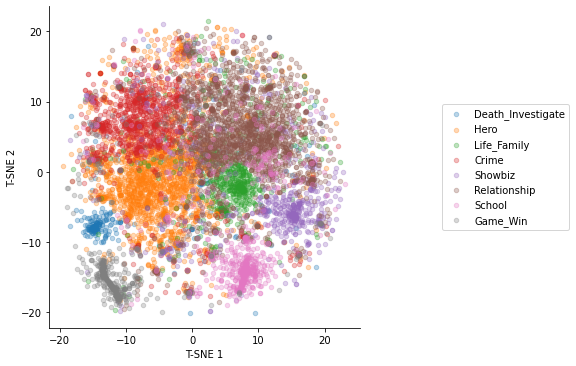

In [88]:
plt.figure
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='T-SNE 1', y='T-SNE 2', data=dft8, fit_reg=False, hue='TopicGroup', legend=False,
scatter_kws={"alpha":0.3,"s":20} )
 
# Move the legend to an empty part of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
 
#sns.plt.show()
plt.savefig("tsne_T8.png")

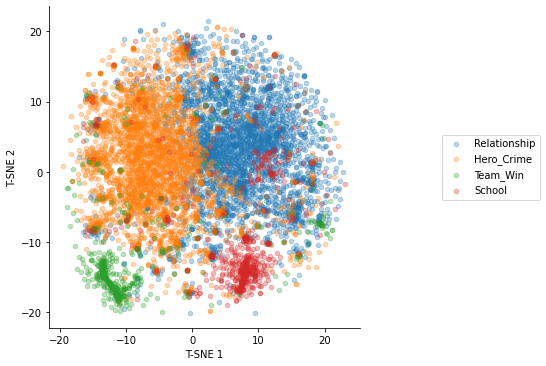

In [89]:
plt.figure
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='T-SNE 1', y='T-SNE 2', data=dft4, fit_reg=False, hue='TopicGroup', legend=False ,scatter_kws={"alpha":0.3,"s":20} )
 
# Move the legend to an empty part of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
 
#sns.plt.show()
plt.savefig("tsne_T4.png")

In [54]:
# Make X, Y columns 
df2['X'] = tsne_features[:,0]
df2['Y'] = tsne_features[:,1]
#df2['Z'] = tsne_features[:,1]

In [55]:
# Make X, Y columns 
dft8['X'] = tsne_features[:,0]
dft8['Y'] = tsne_features[:,1]
#df2['Z'] = tsne_features[:,1]

In [ ]:
#df2['cluster1'] =df2['cluster'].astype('category')

In [ ]:
print (type(df2))

In [56]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
import bokeh.plotting as bpl
output_notebook()
from bokeh.models import CategoricalColorMapper
source = ColumnDataSource(dft8)
import bokeh.models as bmo
from bokeh.palettes import d3
palette = d3['Category10'][len(dft8['TopicGroup'].unique())]

#color_map = CategoricalColorMapper(factors=['0','1','2','3','4','5','6'],
#                                   palette=['red', 'blue', 'green','yellow','violet','orange'])
#.unique(),(df2['cluster'].unique())
color_map = bmo.CategoricalColorMapper(factors=dft8['TopicGroup'].unique(),
                                       palette=palette)
#                                   palette=['#449D66', '#D46666', '#6688EC','#925E78','#BD93BD','F2EDEB','F05365','FABC2A','6EFAFB','FF57BB'])

# Make a source and a scatter plot  

plot = figure(x_axis_label = 'T-SNE 1', 
              y_axis_label = 'T-SNE 2', 
              width = 800, height = 600)
plot.circle(x = 'X', 
    y = 'Y', 
    source = bpl.ColumnDataSource(dft8), 
    size = 5, fill_color={'field' :'TopicGroup' , 'transform' : color_map} , alpha = .7)
#{'field':'cluster', 'transform' : 'color_map'}
#p = bpl.figure()
#p.scatter(x='X', y='Y',
#          color={'field': 'cluster', 'transform': color_map},
#          legend='cluster', source=source)
#bpl.show(p)

Loading BokehJS ...

GlyphRenderer(id='1398', ...)

In [57]:
# Create a HoverTool object
hover = HoverTool(tooltips = [('Title','@Title'),('Topic','@TopicGroup')])
                              #('Genre','@Genre'),
                              #('Year','@Year'),
                             
plot.add_tools(hover)

In [58]:
show(plot)

In [97]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [98]:
#the ideal is to split t-sen into like different clear clusters
#use cosine_similarity to find the recommedation system


## Simple Movie Recommender based on story

In [99]:
#For Movie Recommender we use a new Tfidf with a lower min_df to improve the accuracy of our recommender

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer_mr = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.08, stop_words=stopwords,
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [100]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix_mr = tfidf_vectorizer_mr.fit_transform([x for x in df2['Plot']])

print(tfidf_matrix_mr.shape)

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'becom', 'could', 'dure', 'michael', 'might', 'morn', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'outsid', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(7707, 439)


In [101]:
cosine_sim = cosine_similarity(tfidf_matrix_mr, tfidf_matrix_mr)
cosine_sim

array([[1.        , 0.07089202, 0.10822757, ..., 0.10176693, 0.12818489,
        0.13487171],
       [0.07089202, 1.        , 0.10490468, ..., 0.14304075, 0.09177825,
        0.04727469],
       [0.10822757, 0.10490468, 1.        , ..., 0.22117137, 0.05297891,
        0.13188474],
       ...,
       [0.10176693, 0.14304075, 0.22117137, ..., 1.        , 0.12952584,
        0.19263706],
       [0.12818489, 0.09177825, 0.05297891, ..., 0.12952584, 1.        ,
        0.0794545 ],
       [0.13487171, 0.04727469, 0.13188474, ..., 0.19263706, 0.0794545 ,
        1.        ]])

In [102]:
cosine_sim.shape

(7707, 7707)

In [120]:
indices = pd.Series(df2.Title).reset_index(drop=True)

In [121]:
print(indices)

0                        Airplane!
1                       Alien Dead
2                        Alligator
3                   Altered States
4                  American Gigolo
                   ...            
7702                 Crooked House
7703                      Hostiles
7704    All the Money in the World
7705                  Molly's Game
7706                Phantom Thread
Name: Title, Length: 7707, dtype: object


In [122]:
#function that recommends movie
def recommendation(title , cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # getting the title index in the movie list
    idx = indices[indices == title].index[0]
    #Series with similarity scores where highest similarity are rank 1st
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    #10 most similar                          
    top_10_indexes = list(score_series.iloc[1:11].index)
                             
    for i in top_10_indexes:
        recommended_movies.append(list(df2.Title)[i])
                             
    return recommended_movies                           

In [123]:
recommendation('Pitch Perfect 2') #based on story

['Pitch Perfect 3',
 'Pitch Perfect',
 'Get on Up',
 'Sparkle',
 'Alvin and the Chipmunks: The Squeakquel',
 'Stage Fright',
 'Demolition High',
 'Happy Gilmore',
 'The Five Heartbeats',
 'Incredible Burt Wonderstone, TheThe Incredible Burt Wonderstone']

In [127]:
recommendation('Dracula Untold')

['Interview with the Vampire',
 'Blade',
 'Blade II',
 'Priest',
 'Clash of the Titans',
 'X-Men: The Last Stand',
 'Queen of the Damned',
 'Tarzan',
 'Warcraft',
 'Pandorum']

In [125]:
recommendation('Jurassic Park')

['Jurassic World',
 'The Nut Job 2: Nutty by Nature',
 'Yogi Bear',
 'Characterz',
 'A Troll in Central Park',
 'Jaws 3-D',
 'Beverly Hills Cop III',
 'Music of the Heart',
 'Gosford Park',
 'Free Willy']

import pandas as pd
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3
bpl.output_notebook()
source = bpl.ColumnDataSource(df2)

# use whatever palette you want...
palette = d3['Category20'][len(df2['cluster'].unique())]
color_map = bmo.CategoricalColorMapper(factors=df2['cluster'].unique(),
                                   palette=palette)

# create figure and plot
p = bpl.figure()
p.scatter(x='kpi1', y='kpi2',
          color={'field': 'cluster', 'transform': color_map},
          legend='Genre', source=source)
bpl.show(p)

import nltk
#nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenization_and_stemming(text, run_stemming=True):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
  
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    if run_stemming:
        stems = [stemmer.stem(t) for t in filtered_tokens]
        return stems
    else:
        return filtered_tokens

#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')


docs_stemmed = []
docs_tokenized = []
for i in df2:
    tokenized_and_stemmed_results = tokenization_and_stemming(i)
    docs_stemmed.extend(tokenized_and_stemmed_results)
    
    tokenized_results = tokenization_and_stemming(i, False)
    docs_tokenized.extend(tokenized_results)

# This dict can recover the stemmed word to its original form. {stemmed word: original word}
vocab_frame_dict = {docs_stemmed[x]: docs_tokenized[x] for x in range(len(docs_stemmed))}

from sklearn.feature_extraction.text import TfidfVectorizer
#define vectorizer parameters
tfidf_model = TfidfVectorizer(max_df=0.8, max_features=200000,
                              min_df=0.2, stop_words=stopwords,
                              use_idf=True, 
                              tokenizer=tokenization_and_stemming, 
                              ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(df2) #fit the vectorizer to synopses
# Save the terms identified by TF-IDF. They are words satisfying max_df and min_df condition in TF-IDF model
tf_selected_words = tfidf_model.get_feature_names() # function to convert number to word
print ("There are {} synoposes and {} terms ".format(tfidf_matrix.shape[0], tfidf_matrix.shape[1]))
# tfidf_model.get_params()  stores model info
# tfidf_model.vocabulary_   stores a 1-gram, 2-gram and 3-gram

print (tfidf_matrix)

tfidf_matrix = tfidf_matrix.todense()

from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=325)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# create DataFrame films from all of the input files.
films = {'plot': df2.plot, 'cluster': clusters}
frame = pd.DataFrame(films, index = [clusters] , columns = ['plot', 'cluster'])
frame.head(10)


#df_cluster_summary = frame['cluster'].value_counts().sort_index().to_frame()
#df_cluster_summary.columns = ['count']
#df_cluster_summary['avg rank'] = frame['rank'].groupby(frame['cluster']).mean().sort_index()

#print('{} movies are grouped into {} clusters'.format(tfidf_matrix.shape[0], num_clusters))
#df_cluster_summary

## Clustering

In [109]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf_matrix)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

NameError: name 'KMeans' is not defined

In [ ]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 8 clusters and save as km
km = KMeans(n_clusters=2)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
df2["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
df2['cluster'].value_counts() 

In [ ]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
df2.head

In [ ]:
display_cluster(X,km,2)

In [ ]:
#TSNE + boken

# Initialize dictionary, list, and initial index
ingredient_idx = {}
corpus = []
idx = 0

# For loop for tokenization
for i in range(len(df3)):    
    ingredients = df3['Plot'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    corpus.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1

# Get the number of items and tokens 
M = len(df3)
N = len(ingredient_idx)

# Initialize a matrix of zeros
A = np.zeros((M,N))

# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i+=1